# 动手深度学习

## pytorch基础

In [16]:
# 定义张量（数组）
x = torch.tensor([[1,2,3], [4,6,7]], dtype = torch.float32) # 相当于np.array()，极其相似，但是类型不同
x = torch.arange(12) # 跟np.arange()效果相同
torch.zeros(3,4) # 定义指定形状的数组，类似的numpy操作都可实现
# tensor的四则运算规则同数组的也是相同的性质
# 0维度张量，专门0维度张量的原因是：GPU中不能运行普通的1等标量，只能识别tensor(1)这种0维度张量
torch.tensor([1]) # 1维张量
torch.tensor(1) # 0维张量，也就是标量
# 高维张量：类似于高维numpy数组，不做具体介绍


# 查看张量信息
x.ndim # 返回维度数（有几个维度）
x.shape # 返回形状（每个层维度的个数组合）
len(x) # 返回张量多个维度中最高层级维度的个数
x.numel() # 最底层元素总数量
x.dtype # 查看张量数据类型


# 张量的形变
x = torch.tensor([[1,2,3,4],[5,6,7,8],[9,9,9,9]])
x.flatten() # 将任意维度张量拉伸为1维张量，包括0维张量
x.reshape(3, 4) # 改变张量为指定形状，跟np.reshape相同
x.reshape(12) # 变为1维张量，或者写作x.reshape(12,)，但是x.shape(12,1)是二维张量
# reshape的参数输入对应于.shape的结果，他们的意思是一样的


# 张量的索引
# 1. 与数组的索引相同，但要注意的是，索引找到的最基本的元素都是0维张量，不是基本的标量，比如索引结果是tensor(1),而不是1
# 2. 切片操作基本与numpy数组的索引相同，但有点区别，如下举例
x[1:8:2] # 从第2个元素到第8个元素隔2步索引一次
x[1::2] # 从第2个到尾，隔2步索引一次
x[::2] # 从头到尾，balabala
# 3. x[8:1:-2] 这种操作不行，torch不支持倒着索引
# 4. 高维张量索引，与numpy的也没什么
# 5. index_select(,,)索引：本质上任何索引都可以x[,,,...]解决，但是当维度很高的时候，有些操作会很麻烦。
# 比如我想对一个有100个维度的张量做操作：取出第50个维中的前两行，正常写法是x[:,:,:...,[0,1],:,:,...],过于麻烦，但使用index_select就很方便
# torch.index_select用于取出某一个特定维度的某几个列数据
x = torch.arange(24).reshape(2,3,4)
torch.index_select(x, 2, torch.tensor(0)) # 用法：x是目标张量，第二个参数是第几个维度，第三个参数是索引值，可以是多个，但必须是tensor型，不能是列表或数组型
torch.index_select(x, 1, torch.tensor([0])) # 只索引一个单位时，可以用0维或者1维张量
torch.index_select(x, 0, torch.tensor([0,1])) # 索引多个单位
# 注：torch.tensor([0:1])是不对的！，不能写成切片，第三个参数本质是一个tensor类型的数据！


# 张量的切分
# 1. view()方法，张量的视图
x = torch.arange(12).reshape(3,4)
y = x.view(4,3) # 此处view的作用类似于reshape。看上去y和x是不同的对象，但其实指向同一个存储空间，x和y可以看做一个数据的不同表现形式，改变x后Y也会改变，但仍然是不同形状

# 2. torch.chunk(t, 4, dim = 0)方法：将张量进行切分的函数。t是要被切分的张量，4是等切分成4份，dim是从哪个维度上切，0是默认最高维，以此类推
x = torch.arange(12).reshape(3,4)
y = torch.chunk(x, 4, dim = 1) # y是将x按列切分四等份的结果
# 注：关于输出结果：是一个元组，其元素是切分后的各个单位；切分后的个体也是tensor对象；切分后每个个体仍然保持没切分的维度，不会降维；
# 返回的结果也是视图，不是新对象；默认是等分，但如果不能等分也不会报错，会寻找近似等分，或者不等分

# 3. torch.split(t, [a1,a2,a3...], dim = ) 与chunk相似，但有区别，第二个参数可以输入一个列表，表示自定义切分分配方案，要求总和等于对应维度的分量个数
x = torch.arange(12).reshape(3,4)
y = torch.split(x, 4, dim = 1) # 此时的split与chunk效果相同
z = torch.split(x, [1,1,2], dim = 1) # 按照列进行1、1、2份数分配方案的切分


# 张量的合并
# 1. torch.cat([x,y], dim = 1)，张量拼接操作，类似于numpy的vstack和hstack，以及pandas的concat；dim是选择按哪个维度拼接，默认是0
x = torch.zeros((4,4))
y = torch.zeros((4,4))
torch.cat([x,y], dim = 1) # 按列拼接（横着拼）

# 2. torch.stack([x,y]) 张量堆叠函数，并不是拼接，而是把相同形状的多个张量堆到一起，整体升高一个维度（类似于list的append）
# 注：x和y的shape必须完全相同才行，否则会报错


# 张量的广播
# 1. 相同维度相同形状的两个张量广播，对应位置进行计算即可
# 2. 相同维度不同形状的两个张量广播，要求在导致形状不同的每个维度上，两个张量中至少有一个在该维度的分量数只有1才行
# 3. 不同维度的两个张量广播，低纬度的张量先升维到与高纬度张量相同维度，然后再按照同纬度张量广播规则判定即可
# 不同维度广播运算举例：x.shape = (2,1)， y.shape = (3,2,4)。x根据情况选择升维成(1,2,1)，然后(1,2,1)与(3,2,4)是课广播的


# 基本并行运算（axis与dim都可以使用，效果相同)
x = torch.arange(12).reshape(3,4)
x.sum() # 对所有元素求和
x.sum(dim = 0) # 对所有行求和，返回长度为3的向量
x.sum(dim = 1) # 对所有列求和，返回长度为4的向量
x,sum(dim = [0, 1]) # 对于多维数组，对其中某几维进行求和，这里只有2维所以结果跟sum()一样
# 排序运算
x = torch.randn(12).reshape(3,4) 
y = x.sort(dim = 1, descending = False).values # 将x按照某个维度升序（默认）排序，这个维度的每个分量都会独立进行排序（打乱对应关系），默认是0；返回的内容比较复杂，.values后是值



# 矩阵的基本运算
t1 = torch.arange(1,7).reshape(2,3).float()
t2 = torch.arange(1,10).reshape(3,3).float()
t = torch.arange(3).float()
torch.t(t1) # 矩阵转置 
torch.eye(3) # 单位阵创建
torch.diag(t1.reshape(6)) # 将1维张量变成对角阵元素
torch.dot(t,t) # 向量内积运算，dot只支持向量运算
torch.mm(t1,t2) # 矩阵乘法，t1 * t2是对应元素相乘
torch.mv(t1,t) ### 注意：特殊的矩阵与向量相乘的方法，并非是矩阵运算，而是把矩阵的每行当成一个向量分别与某个向量进行内积，返回各自内积结果组成的1维向量
torch.mv(t2, t.reshape(3,1)) # 会报错，不能竖着来
torch.mm(t1, t.reshape(3,1)) # 作为矩阵运算可以

# 矩阵线性代数运算（不举例了，懒）
torch.trace() # 矩阵的迹
torch.matrix_rank() # 矩阵的秩
torch.det() # 矩阵行列式计算
torch.inverse() # 矩阵求逆
torch.lstsq(y, X) # 最小二乘结果，y是因变量，X是带1列向量的变量矩阵
torch.linalg.norm(t) # 求张量内所有元素平方和开根号（必须是float类型）
torch.linalg.norm(t,1) # 求张量内所有元素绝对值和（必须是float类型）



# 微分运算
a = torch.tensor(1., requires_grad = True) # 创建一个张量的时候可以设置这个张量是否可以进行微分运算，默认是False（必须针对浮点型）
b = torch.tensor(1., requires_grad = True)
a.requires_grad # 用于查看这个张量是否可以微分
# a.requires_grad = False # 可以设置为False
sse = torch.pow((2-a-b),2) + torch.pow((4-3*a-b),2)
torch.autograd.grad(sse, [a, b]) # 这个是对sse这个函数进行偏导运算，a和b就是变量，但是要先赋值，然后返回的是sse在a和b两个方向的导数在他们各自取值下的导数值

x = torch.tensor(1., requires_grad = True)
y = x ** 2
y.retain_grad() # 加上这个后，z对x进行求导时候也能顺带保存z对y求导的中间结果，没有这句，不能y.grad
z = y ** 2
y.requires_grad # True
z.requires_grad # True
z.backward() # 反向传播，就是z对最底层的x求导，结果再代入x的值的最终结果，这个本身不返回什么
x.grad # 紧接着可以这样来查看刚才计算的结果，这个是用来看x的求导结果的
y.grad # 作为中间变量的y，在z对x求导的过程中，只有在y.retain_grad()被设置才可以
# y.backward() # y也是可以对x求梯度的
# 切记，一个计算图只能backward一次，比如z.backward()之后，就不能再y.backward()了，如下：
x = torch.arange(4., requires_grad = True)
y = torch.dot(x, x)
z = y ** 2 # xyz属于一个计算图
y.backward() # y先进行梯度下降
print(x.grad) 
z.backward() # 这时候会报错，因为这个计算图已经计算过梯度了

# 改成下面这样可避免问题
x = torch.arange(4., requires_grad = True)
y = torch.dot(x, x)
z = x.sum() # xy和xz属于两个不同的计算图
y.backward() # y先进行梯度下降
print(x.grad) 
z.backward() # 正常计算

# 继续引出手动梯度清零：上面结果中的第二个x.grad的输出值不是z对x求导代入后的值，而是这个值加上了之前y对x求导得到的值，x梯度会默认累加
x.grad.zero_() # 将过往累加的梯度清零，重新开始

tensor([[1, 2, 3],
        [4, 6, 7]])

## 学习实践

nn.Linear

In [3]:
import torch as t
from torch import nn
# 例子1
m = nn.Linear(20, 30) # 规定输入向量大小为20，输出是30
input = torch.randn(1,20) # 定义一个二维张量，第二个参数的值必须是20，这代表输入维度，第一个参数是样本数，可随意调整大小，但是必须两个维度都有
output = m(input) # 调用全连接层
output.size()

# 例子2
connected_layer = nn.Linear(in_features = 64*64*3, out_features = 1) # in_features由输入张量的形状决定，out_features则决定了输出张量的形状 
input = t.randn(64,64,3) # 假定输入的图像形状为[64,64,3]
input = input.view(1, 64*64*3) # 将四维张量转换为二维张量之后，才能作为全连接层的输入；前面的1可认为是样本数，不能缺少
print(input.shape)
output = connected_layer(input) # 调用全连接层
print(output.shape)

torch.Size([1, 12288])
torch.Size([1, 1])


## CNN经典网络

### LeNet

In [4]:
import torch
from torch import nn
import d2lzh_pytorch as d2l
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size = 5, stride = 1, padding = 2), nn.Sigmoid()
            ,nn.AvgPool2d(kernel_size = 2, stride = 2)
            ,nn.Conv2d(6, 16, kernel_size = 5), nn.Sigmoid()
            ,nn.AvgPool2d(kernel_size = 2, stride = 2), nn.Flatten()
            ,nn.Linear(16*5*5, 120), nn.Sigmoid()
            ,nn.Linear(120, 84), nn.Sigmoid()
            ,nn.Linear(84, 10))
    def forward(self, x):
        return self.net(x.view(-1, 1, 28, 28)) # -1表示由其他维度计算后得出
x = torch.randn(5, 1, 28, 28) # 创建数据
lenet = LeNet()
lenet(x)

tensor([[ 0.0510,  0.1954,  0.2974, -0.0540, -0.4502,  0.2356, -0.1149,  0.0008,
         -0.1557,  0.3028],
        [ 0.0510,  0.1953,  0.2975, -0.0539, -0.4503,  0.2357, -0.1148,  0.0008,
         -0.1557,  0.3030],
        [ 0.0510,  0.1953,  0.2973, -0.0539, -0.4502,  0.2356, -0.1147,  0.0008,
         -0.1558,  0.3029],
        [ 0.0510,  0.1953,  0.2974, -0.0539, -0.4503,  0.2357, -0.1148,  0.0008,
         -0.1558,  0.3029],
        [ 0.0510,  0.1954,  0.2975, -0.0540, -0.4502,  0.2357, -0.1148,  0.0008,
         -0.1558,  0.3028]], grad_fn=<AddmmBackward>)

In [2]:
x = torch.randn(5, 1, 28, 28)
x.view(-1, 1, 28, 28).shape

torch.Size([5, 1, 28, 28])

In [1]:
import sklearn.datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib qt5
import warnings
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore') # 关闭警告
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200,noise=0.2)
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

#our class must extend nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        x = F.softmax(x)
        return x
              
    def predict(self,x):
        pred = self.forward(x)
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
  
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
 
epochs = 50000
px = []
losses = []
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.ion() 
for i in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred,y)
    print("echo:",i+1, " loss:", round(loss.item(),5))
    losses.append(loss.item())
#     px.append(i)
#     if i%10 == 0:
#         plt.clf() 
#         plt.plot(px, losses, label = "CrossEntropy")
#         plt.grid()
#         plt.title("训练过程的loss曲线")
#         plt.xlabel("迭代次数")
#         plt.ylabel("迭代损失")
#         plt.legend()
#         plt.pause(0.5)
#         plt.ioff() 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(accuracy_score(model.predict(X),y))

# 模型存储
# torch.save(model.state_dict(), "simple_net") # 存储训练好的模型参数
# model1 = Net() # 加载的时候自行写模型
# model1.load_state_dict(torch.load("simple_net")) # 加载模型参数
# model1.eval() # 固定非参数层

echo: 1  loss: 0.67483
echo: 2  loss: 0.67027
echo: 3  loss: 0.66555
echo: 4  loss: 0.66068
echo: 5  loss: 0.65568
echo: 6  loss: 0.65056
echo: 7  loss: 0.64534
echo: 8  loss: 0.64004
echo: 9  loss: 0.63467
echo: 10  loss: 0.62923
echo: 11  loss: 0.62375
echo: 12  loss: 0.61822
echo: 13  loss: 0.61268
echo: 14  loss: 0.60712
echo: 15  loss: 0.60158
echo: 16  loss: 0.59608
echo: 17  loss: 0.59063
echo: 18  loss: 0.58526
echo: 19  loss: 0.57998
echo: 20  loss: 0.57483
echo: 21  loss: 0.5698
echo: 22  loss: 0.56492
echo: 23  loss: 0.56019
echo: 24  loss: 0.55562
echo: 25  loss: 0.55123
echo: 26  loss: 0.54701
echo: 27  loss: 0.54297
echo: 28  loss: 0.53911
echo: 29  loss: 0.53544
echo: 30  loss: 0.53194
echo: 31  loss: 0.52863
echo: 32  loss: 0.52549
echo: 33  loss: 0.52251
echo: 34  loss: 0.5197
echo: 35  loss: 0.51704
echo: 36  loss: 0.51452
echo: 37  loss: 0.51214
echo: 38  loss: 0.50989
echo: 39  loss: 0.50776
echo: 40  loss: 0.50574
echo: 41  loss: 0.50383
echo: 42  loss: 0.50201
ech

echo: 342  loss: 0.44504
echo: 343  loss: 0.44503
echo: 344  loss: 0.44503
echo: 345  loss: 0.44502
echo: 346  loss: 0.44501
echo: 347  loss: 0.445
echo: 348  loss: 0.44499
echo: 349  loss: 0.44498
echo: 350  loss: 0.44498
echo: 351  loss: 0.44497
echo: 352  loss: 0.44496
echo: 353  loss: 0.44495
echo: 354  loss: 0.44494
echo: 355  loss: 0.44493
echo: 356  loss: 0.44492
echo: 357  loss: 0.44491
echo: 358  loss: 0.44491
echo: 359  loss: 0.4449
echo: 360  loss: 0.44489
echo: 361  loss: 0.44488
echo: 362  loss: 0.44487
echo: 363  loss: 0.44486
echo: 364  loss: 0.44485
echo: 365  loss: 0.44484
echo: 366  loss: 0.44483
echo: 367  loss: 0.44482
echo: 368  loss: 0.44481
echo: 369  loss: 0.4448
echo: 370  loss: 0.44479
echo: 371  loss: 0.44478
echo: 372  loss: 0.44477
echo: 373  loss: 0.44476
echo: 374  loss: 0.44475
echo: 375  loss: 0.44474
echo: 376  loss: 0.44473
echo: 377  loss: 0.44472
echo: 378  loss: 0.44471
echo: 379  loss: 0.4447
echo: 380  loss: 0.44468
echo: 381  loss: 0.44467
echo:

echo: 672  loss: 0.3654
echo: 673  loss: 0.36522
echo: 674  loss: 0.36504
echo: 675  loss: 0.36486
echo: 676  loss: 0.36469
echo: 677  loss: 0.36452
echo: 678  loss: 0.36435
echo: 679  loss: 0.36418
echo: 680  loss: 0.36402
echo: 681  loss: 0.36386
echo: 682  loss: 0.36369
echo: 683  loss: 0.36353
echo: 684  loss: 0.36338
echo: 685  loss: 0.36322
echo: 686  loss: 0.36306
echo: 687  loss: 0.36291
echo: 688  loss: 0.36276
echo: 689  loss: 0.36261
echo: 690  loss: 0.36246
echo: 691  loss: 0.36232
echo: 692  loss: 0.36217
echo: 693  loss: 0.36203
echo: 694  loss: 0.36189
echo: 695  loss: 0.36175
echo: 696  loss: 0.36161
echo: 697  loss: 0.36147
echo: 698  loss: 0.36133
echo: 699  loss: 0.3612
echo: 700  loss: 0.36106
echo: 701  loss: 0.36093
echo: 702  loss: 0.3608
echo: 703  loss: 0.36067
echo: 704  loss: 0.36054
echo: 705  loss: 0.36042
echo: 706  loss: 0.36029
echo: 707  loss: 0.36017
echo: 708  loss: 0.36004
echo: 709  loss: 0.35992
echo: 710  loss: 0.3598
echo: 711  loss: 0.35968
echo

echo: 1002  loss: 0.34291
echo: 1003  loss: 0.34288
echo: 1004  loss: 0.34285
echo: 1005  loss: 0.34281
echo: 1006  loss: 0.34278
echo: 1007  loss: 0.34275
echo: 1008  loss: 0.34271
echo: 1009  loss: 0.34268
echo: 1010  loss: 0.34265
echo: 1011  loss: 0.34262
echo: 1012  loss: 0.34259
echo: 1013  loss: 0.34255
echo: 1014  loss: 0.34252
echo: 1015  loss: 0.34249
echo: 1016  loss: 0.34246
echo: 1017  loss: 0.34243
echo: 1018  loss: 0.3424
echo: 1019  loss: 0.34237
echo: 1020  loss: 0.34234
echo: 1021  loss: 0.34231
echo: 1022  loss: 0.34228
echo: 1023  loss: 0.34225
echo: 1024  loss: 0.34222
echo: 1025  loss: 0.34219
echo: 1026  loss: 0.34216
echo: 1027  loss: 0.34213
echo: 1028  loss: 0.3421
echo: 1029  loss: 0.34207
echo: 1030  loss: 0.34205
echo: 1031  loss: 0.34202
echo: 1032  loss: 0.34199
echo: 1033  loss: 0.34196
echo: 1034  loss: 0.34193
echo: 1035  loss: 0.34191
echo: 1036  loss: 0.34188
echo: 1037  loss: 0.34185
echo: 1038  loss: 0.34182
echo: 1039  loss: 0.3418
echo: 1040  los

echo: 1322  loss: 0.33719
echo: 1323  loss: 0.33718
echo: 1324  loss: 0.33717
echo: 1325  loss: 0.33716
echo: 1326  loss: 0.33715
echo: 1327  loss: 0.33714
echo: 1328  loss: 0.33713
echo: 1329  loss: 0.33712
echo: 1330  loss: 0.33711
echo: 1331  loss: 0.3371
echo: 1332  loss: 0.33709
echo: 1333  loss: 0.33708
echo: 1334  loss: 0.33707
echo: 1335  loss: 0.33706
echo: 1336  loss: 0.33705
echo: 1337  loss: 0.33704
echo: 1338  loss: 0.33703
echo: 1339  loss: 0.33702
echo: 1340  loss: 0.33701
echo: 1341  loss: 0.337
echo: 1342  loss: 0.33699
echo: 1343  loss: 0.33698
echo: 1344  loss: 0.33697
echo: 1345  loss: 0.33696
echo: 1346  loss: 0.33695
echo: 1347  loss: 0.33694
echo: 1348  loss: 0.33693
echo: 1349  loss: 0.33692
echo: 1350  loss: 0.33691
echo: 1351  loss: 0.3369
echo: 1352  loss: 0.33689
echo: 1353  loss: 0.33688
echo: 1354  loss: 0.33687
echo: 1355  loss: 0.33686
echo: 1356  loss: 0.33685
echo: 1357  loss: 0.33684
echo: 1358  loss: 0.33683
echo: 1359  loss: 0.33682
echo: 1360  loss

echo: 1642  loss: 0.3347
echo: 1643  loss: 0.33469
echo: 1644  loss: 0.33469
echo: 1645  loss: 0.33468
echo: 1646  loss: 0.33468
echo: 1647  loss: 0.33467
echo: 1648  loss: 0.33466
echo: 1649  loss: 0.33466
echo: 1650  loss: 0.33465
echo: 1651  loss: 0.33465
echo: 1652  loss: 0.33464
echo: 1653  loss: 0.33464
echo: 1654  loss: 0.33463
echo: 1655  loss: 0.33462
echo: 1656  loss: 0.33462
echo: 1657  loss: 0.33461
echo: 1658  loss: 0.33461
echo: 1659  loss: 0.3346
echo: 1660  loss: 0.3346
echo: 1661  loss: 0.33459
echo: 1662  loss: 0.33458
echo: 1663  loss: 0.33458
echo: 1664  loss: 0.33457
echo: 1665  loss: 0.33457
echo: 1666  loss: 0.33456
echo: 1667  loss: 0.33456
echo: 1668  loss: 0.33455
echo: 1669  loss: 0.33454
echo: 1670  loss: 0.33454
echo: 1671  loss: 0.33453
echo: 1672  loss: 0.33453
echo: 1673  loss: 0.33452
echo: 1674  loss: 0.33452
echo: 1675  loss: 0.33451
echo: 1676  loss: 0.33451
echo: 1677  loss: 0.3345
echo: 1678  loss: 0.33449
echo: 1679  loss: 0.33449
echo: 1680  loss

echo: 1962  loss: 0.3332
echo: 1963  loss: 0.3332
echo: 1964  loss: 0.33319
echo: 1965  loss: 0.33319
echo: 1966  loss: 0.33319
echo: 1967  loss: 0.33318
echo: 1968  loss: 0.33318
echo: 1969  loss: 0.33317
echo: 1970  loss: 0.33317
echo: 1971  loss: 0.33317
echo: 1972  loss: 0.33316
echo: 1973  loss: 0.33316
echo: 1974  loss: 0.33316
echo: 1975  loss: 0.33315
echo: 1976  loss: 0.33315
echo: 1977  loss: 0.33314
echo: 1978  loss: 0.33314
echo: 1979  loss: 0.33314
echo: 1980  loss: 0.33313
echo: 1981  loss: 0.33313
echo: 1982  loss: 0.33313
echo: 1983  loss: 0.33312
echo: 1984  loss: 0.33312
echo: 1985  loss: 0.33311
echo: 1986  loss: 0.33311
echo: 1987  loss: 0.33311
echo: 1988  loss: 0.3331
echo: 1989  loss: 0.3331
echo: 1990  loss: 0.3331
echo: 1991  loss: 0.33309
echo: 1992  loss: 0.33309
echo: 1993  loss: 0.33309
echo: 1994  loss: 0.33308
echo: 1995  loss: 0.33308
echo: 1996  loss: 0.33307
echo: 1997  loss: 0.33307
echo: 1998  loss: 0.33307
echo: 1999  loss: 0.33306
echo: 2000  loss:

echo: 2282  loss: 0.33218
echo: 2283  loss: 0.33218
echo: 2284  loss: 0.33217
echo: 2285  loss: 0.33217
echo: 2286  loss: 0.33217
echo: 2287  loss: 0.33217
echo: 2288  loss: 0.33216
echo: 2289  loss: 0.33216
echo: 2290  loss: 0.33216
echo: 2291  loss: 0.33216
echo: 2292  loss: 0.33215
echo: 2293  loss: 0.33215
echo: 2294  loss: 0.33215
echo: 2295  loss: 0.33214
echo: 2296  loss: 0.33214
echo: 2297  loss: 0.33214
echo: 2298  loss: 0.33214
echo: 2299  loss: 0.33213
echo: 2300  loss: 0.33213
echo: 2301  loss: 0.33213
echo: 2302  loss: 0.33213
echo: 2303  loss: 0.33212
echo: 2304  loss: 0.33212
echo: 2305  loss: 0.33212
echo: 2306  loss: 0.33212
echo: 2307  loss: 0.33211
echo: 2308  loss: 0.33211
echo: 2309  loss: 0.33211
echo: 2310  loss: 0.3321
echo: 2311  loss: 0.3321
echo: 2312  loss: 0.3321
echo: 2313  loss: 0.3321
echo: 2314  loss: 0.33209
echo: 2315  loss: 0.33209
echo: 2316  loss: 0.33209
echo: 2317  loss: 0.33209
echo: 2318  loss: 0.33208
echo: 2319  loss: 0.33208
echo: 2320  loss

echo: 2602  loss: 0.33143
echo: 2603  loss: 0.33142
echo: 2604  loss: 0.33142
echo: 2605  loss: 0.33142
echo: 2606  loss: 0.33142
echo: 2607  loss: 0.33142
echo: 2608  loss: 0.33141
echo: 2609  loss: 0.33141
echo: 2610  loss: 0.33141
echo: 2611  loss: 0.33141
echo: 2612  loss: 0.33141
echo: 2613  loss: 0.3314
echo: 2614  loss: 0.3314
echo: 2615  loss: 0.3314
echo: 2616  loss: 0.3314
echo: 2617  loss: 0.3314
echo: 2618  loss: 0.33139
echo: 2619  loss: 0.33139
echo: 2620  loss: 0.33139
echo: 2621  loss: 0.33139
echo: 2622  loss: 0.33139
echo: 2623  loss: 0.33138
echo: 2624  loss: 0.33138
echo: 2625  loss: 0.33138
echo: 2626  loss: 0.33138
echo: 2627  loss: 0.33137
echo: 2628  loss: 0.33137
echo: 2629  loss: 0.33137
echo: 2630  loss: 0.33137
echo: 2631  loss: 0.33137
echo: 2632  loss: 0.33136
echo: 2633  loss: 0.33136
echo: 2634  loss: 0.33136
echo: 2635  loss: 0.33136
echo: 2636  loss: 0.33136
echo: 2637  loss: 0.33135
echo: 2638  loss: 0.33135
echo: 2639  loss: 0.33135
echo: 2640  loss:

echo: 2922  loss: 0.33084
echo: 2923  loss: 0.33084
echo: 2924  loss: 0.33084
echo: 2925  loss: 0.33084
echo: 2926  loss: 0.33083
echo: 2927  loss: 0.33083
echo: 2928  loss: 0.33083
echo: 2929  loss: 0.33083
echo: 2930  loss: 0.33083
echo: 2931  loss: 0.33083
echo: 2932  loss: 0.33082
echo: 2933  loss: 0.33082
echo: 2934  loss: 0.33082
echo: 2935  loss: 0.33082
echo: 2936  loss: 0.33082
echo: 2937  loss: 0.33082
echo: 2938  loss: 0.33081
echo: 2939  loss: 0.33081
echo: 2940  loss: 0.33081
echo: 2941  loss: 0.33081
echo: 2942  loss: 0.33081
echo: 2943  loss: 0.33081
echo: 2944  loss: 0.3308
echo: 2945  loss: 0.3308
echo: 2946  loss: 0.3308
echo: 2947  loss: 0.3308
echo: 2948  loss: 0.3308
echo: 2949  loss: 0.3308
echo: 2950  loss: 0.3308
echo: 2951  loss: 0.33079
echo: 2952  loss: 0.33079
echo: 2953  loss: 0.33079
echo: 2954  loss: 0.33079
echo: 2955  loss: 0.33079
echo: 2956  loss: 0.33079
echo: 2957  loss: 0.33078
echo: 2958  loss: 0.33078
echo: 2959  loss: 0.33078
echo: 2960  loss: 0

echo: 3242  loss: 0.33037
echo: 3243  loss: 0.33037
echo: 3244  loss: 0.33037
echo: 3245  loss: 0.33037
echo: 3246  loss: 0.33037
echo: 3247  loss: 0.33037
echo: 3248  loss: 0.33036
echo: 3249  loss: 0.33036
echo: 3250  loss: 0.33036
echo: 3251  loss: 0.33036
echo: 3252  loss: 0.33036
echo: 3253  loss: 0.33036
echo: 3254  loss: 0.33036
echo: 3255  loss: 0.33035
echo: 3256  loss: 0.33035
echo: 3257  loss: 0.33035
echo: 3258  loss: 0.33035
echo: 3259  loss: 0.33035
echo: 3260  loss: 0.33035
echo: 3261  loss: 0.33035
echo: 3262  loss: 0.33035
echo: 3263  loss: 0.33034
echo: 3264  loss: 0.33034
echo: 3265  loss: 0.33034
echo: 3266  loss: 0.33034
echo: 3267  loss: 0.33034
echo: 3268  loss: 0.33034
echo: 3269  loss: 0.33034
echo: 3270  loss: 0.33034
echo: 3271  loss: 0.33033
echo: 3272  loss: 0.33033
echo: 3273  loss: 0.33033
echo: 3274  loss: 0.33033
echo: 3275  loss: 0.33033
echo: 3276  loss: 0.33033
echo: 3277  loss: 0.33033
echo: 3278  loss: 0.33033
echo: 3279  loss: 0.33032
echo: 3280  

echo: 3562  loss: 0.32999
echo: 3563  loss: 0.32999
echo: 3564  loss: 0.32999
echo: 3565  loss: 0.32999
echo: 3566  loss: 0.32999
echo: 3567  loss: 0.32999
echo: 3568  loss: 0.32999
echo: 3569  loss: 0.32999
echo: 3570  loss: 0.32998
echo: 3571  loss: 0.32998
echo: 3572  loss: 0.32998
echo: 3573  loss: 0.32998
echo: 3574  loss: 0.32998
echo: 3575  loss: 0.32998
echo: 3576  loss: 0.32998
echo: 3577  loss: 0.32998
echo: 3578  loss: 0.32998
echo: 3579  loss: 0.32997
echo: 3580  loss: 0.32997
echo: 3581  loss: 0.32997
echo: 3582  loss: 0.32997
echo: 3583  loss: 0.32997
echo: 3584  loss: 0.32997
echo: 3585  loss: 0.32997
echo: 3586  loss: 0.32997
echo: 3587  loss: 0.32997
echo: 3588  loss: 0.32997
echo: 3589  loss: 0.32996
echo: 3590  loss: 0.32996
echo: 3591  loss: 0.32996
echo: 3592  loss: 0.32996
echo: 3593  loss: 0.32996
echo: 3594  loss: 0.32996
echo: 3595  loss: 0.32996
echo: 3596  loss: 0.32996
echo: 3597  loss: 0.32996
echo: 3598  loss: 0.32995
echo: 3599  loss: 0.32995
echo: 3600  

echo: 3882  loss: 0.32968
echo: 3883  loss: 0.32968
echo: 3884  loss: 0.32968
echo: 3885  loss: 0.32968
echo: 3886  loss: 0.32968
echo: 3887  loss: 0.32968
echo: 3888  loss: 0.32968
echo: 3889  loss: 0.32968
echo: 3890  loss: 0.32968
echo: 3891  loss: 0.32968
echo: 3892  loss: 0.32968
echo: 3893  loss: 0.32967
echo: 3894  loss: 0.32967
echo: 3895  loss: 0.32967
echo: 3896  loss: 0.32967
echo: 3897  loss: 0.32967
echo: 3898  loss: 0.32967
echo: 3899  loss: 0.32967
echo: 3900  loss: 0.32967
echo: 3901  loss: 0.32967
echo: 3902  loss: 0.32967
echo: 3903  loss: 0.32967
echo: 3904  loss: 0.32967
echo: 3905  loss: 0.32966
echo: 3906  loss: 0.32966
echo: 3907  loss: 0.32966
echo: 3908  loss: 0.32966
echo: 3909  loss: 0.32966
echo: 3910  loss: 0.32966
echo: 3911  loss: 0.32966
echo: 3912  loss: 0.32966
echo: 3913  loss: 0.32966
echo: 3914  loss: 0.32966
echo: 3915  loss: 0.32966
echo: 3916  loss: 0.32965
echo: 3917  loss: 0.32965
echo: 3918  loss: 0.32965
echo: 3919  loss: 0.32965
echo: 3920  

echo: 4202  loss: 0.32943
echo: 4203  loss: 0.32943
echo: 4204  loss: 0.32943
echo: 4205  loss: 0.32943
echo: 4206  loss: 0.32943
echo: 4207  loss: 0.32943
echo: 4208  loss: 0.32943
echo: 4209  loss: 0.32943
echo: 4210  loss: 0.32943
echo: 4211  loss: 0.32943
echo: 4212  loss: 0.32943
echo: 4213  loss: 0.32943
echo: 4214  loss: 0.32942
echo: 4215  loss: 0.32942
echo: 4216  loss: 0.32942
echo: 4217  loss: 0.32942
echo: 4218  loss: 0.32942
echo: 4219  loss: 0.32942
echo: 4220  loss: 0.32942
echo: 4221  loss: 0.32942
echo: 4222  loss: 0.32942
echo: 4223  loss: 0.32942
echo: 4224  loss: 0.32942
echo: 4225  loss: 0.32942
echo: 4226  loss: 0.32942
echo: 4227  loss: 0.32942
echo: 4228  loss: 0.32941
echo: 4229  loss: 0.32941
echo: 4230  loss: 0.32941
echo: 4231  loss: 0.32941
echo: 4232  loss: 0.32941
echo: 4233  loss: 0.32941
echo: 4234  loss: 0.32941
echo: 4235  loss: 0.32941
echo: 4236  loss: 0.32941
echo: 4237  loss: 0.32941
echo: 4238  loss: 0.32941
echo: 4239  loss: 0.32941
echo: 4240  

echo: 4522  loss: 0.32923
echo: 4523  loss: 0.32923
echo: 4524  loss: 0.32923
echo: 4525  loss: 0.32923
echo: 4526  loss: 0.32923
echo: 4527  loss: 0.32923
echo: 4528  loss: 0.32922
echo: 4529  loss: 0.32922
echo: 4530  loss: 0.32922
echo: 4531  loss: 0.32922
echo: 4532  loss: 0.32922
echo: 4533  loss: 0.32922
echo: 4534  loss: 0.32922
echo: 4535  loss: 0.32922
echo: 4536  loss: 0.32922
echo: 4537  loss: 0.32922
echo: 4538  loss: 0.32922
echo: 4539  loss: 0.32922
echo: 4540  loss: 0.32922
echo: 4541  loss: 0.32922
echo: 4542  loss: 0.32922
echo: 4543  loss: 0.32922
echo: 4544  loss: 0.32922
echo: 4545  loss: 0.32922
echo: 4546  loss: 0.32921
echo: 4547  loss: 0.32921
echo: 4548  loss: 0.32921
echo: 4549  loss: 0.32921
echo: 4550  loss: 0.32921
echo: 4551  loss: 0.32921
echo: 4552  loss: 0.32921
echo: 4553  loss: 0.32921
echo: 4554  loss: 0.32921
echo: 4555  loss: 0.32921
echo: 4556  loss: 0.32921
echo: 4557  loss: 0.32921
echo: 4558  loss: 0.32921
echo: 4559  loss: 0.32921
echo: 4560  

echo: 4842  loss: 0.32906
echo: 4843  loss: 0.32906
echo: 4844  loss: 0.32906
echo: 4845  loss: 0.32906
echo: 4846  loss: 0.32906
echo: 4847  loss: 0.32906
echo: 4848  loss: 0.32906
echo: 4849  loss: 0.32906
echo: 4850  loss: 0.32906
echo: 4851  loss: 0.32906
echo: 4852  loss: 0.32906
echo: 4853  loss: 0.32906
echo: 4854  loss: 0.32906
echo: 4855  loss: 0.32906
echo: 4856  loss: 0.32906
echo: 4857  loss: 0.32905
echo: 4858  loss: 0.32905
echo: 4859  loss: 0.32905
echo: 4860  loss: 0.32905
echo: 4861  loss: 0.32905
echo: 4862  loss: 0.32905
echo: 4863  loss: 0.32905
echo: 4864  loss: 0.32905
echo: 4865  loss: 0.32905
echo: 4866  loss: 0.32905
echo: 4867  loss: 0.32905
echo: 4868  loss: 0.32905
echo: 4869  loss: 0.32905
echo: 4870  loss: 0.32905
echo: 4871  loss: 0.32905
echo: 4872  loss: 0.32905
echo: 4873  loss: 0.32905
echo: 4874  loss: 0.32905
echo: 4875  loss: 0.32905
echo: 4876  loss: 0.32905
echo: 4877  loss: 0.32905
echo: 4878  loss: 0.32904
echo: 4879  loss: 0.32904
echo: 4880  

echo: 5162  loss: 0.32893
echo: 5163  loss: 0.32893
echo: 5164  loss: 0.32892
echo: 5165  loss: 0.32892
echo: 5166  loss: 0.32892
echo: 5167  loss: 0.32892
echo: 5168  loss: 0.32892
echo: 5169  loss: 0.32892
echo: 5170  loss: 0.32892
echo: 5171  loss: 0.32892
echo: 5172  loss: 0.32892
echo: 5173  loss: 0.32892
echo: 5174  loss: 0.32892
echo: 5175  loss: 0.32892
echo: 5176  loss: 0.32892
echo: 5177  loss: 0.32892
echo: 5178  loss: 0.32892
echo: 5179  loss: 0.32892
echo: 5180  loss: 0.32892
echo: 5181  loss: 0.32892
echo: 5182  loss: 0.32892
echo: 5183  loss: 0.32892
echo: 5184  loss: 0.32892
echo: 5185  loss: 0.32892
echo: 5186  loss: 0.32892
echo: 5187  loss: 0.32892
echo: 5188  loss: 0.32892
echo: 5189  loss: 0.32892
echo: 5190  loss: 0.32891
echo: 5191  loss: 0.32891
echo: 5192  loss: 0.32891
echo: 5193  loss: 0.32891
echo: 5194  loss: 0.32891
echo: 5195  loss: 0.32891
echo: 5196  loss: 0.32891
echo: 5197  loss: 0.32891
echo: 5198  loss: 0.32891
echo: 5199  loss: 0.32891
echo: 5200  

echo: 5482  loss: 0.32881
echo: 5483  loss: 0.32881
echo: 5484  loss: 0.32881
echo: 5485  loss: 0.32881
echo: 5486  loss: 0.32881
echo: 5487  loss: 0.32881
echo: 5488  loss: 0.32881
echo: 5489  loss: 0.32881
echo: 5490  loss: 0.32881
echo: 5491  loss: 0.32881
echo: 5492  loss: 0.32881
echo: 5493  loss: 0.32881
echo: 5494  loss: 0.32881
echo: 5495  loss: 0.32881
echo: 5496  loss: 0.32881
echo: 5497  loss: 0.32881
echo: 5498  loss: 0.32881
echo: 5499  loss: 0.32881
echo: 5500  loss: 0.32881
echo: 5501  loss: 0.32881
echo: 5502  loss: 0.32881
echo: 5503  loss: 0.32881
echo: 5504  loss: 0.32881
echo: 5505  loss: 0.32881
echo: 5506  loss: 0.32881
echo: 5507  loss: 0.32881
echo: 5508  loss: 0.32881
echo: 5509  loss: 0.32881
echo: 5510  loss: 0.32881
echo: 5511  loss: 0.32881
echo: 5512  loss: 0.3288
echo: 5513  loss: 0.3288
echo: 5514  loss: 0.3288
echo: 5515  loss: 0.3288
echo: 5516  loss: 0.3288
echo: 5517  loss: 0.3288
echo: 5518  loss: 0.3288
echo: 5519  loss: 0.3288
echo: 5520  loss: 0.

echo: 5802  loss: 0.32872
echo: 5803  loss: 0.32872
echo: 5804  loss: 0.32872
echo: 5805  loss: 0.32872
echo: 5806  loss: 0.32872
echo: 5807  loss: 0.32872
echo: 5808  loss: 0.32872
echo: 5809  loss: 0.32872
echo: 5810  loss: 0.32872
echo: 5811  loss: 0.32872
echo: 5812  loss: 0.32872
echo: 5813  loss: 0.32872
echo: 5814  loss: 0.32872
echo: 5815  loss: 0.32872
echo: 5816  loss: 0.32872
echo: 5817  loss: 0.32872
echo: 5818  loss: 0.32872
echo: 5819  loss: 0.32872
echo: 5820  loss: 0.32872
echo: 5821  loss: 0.32872
echo: 5822  loss: 0.32872
echo: 5823  loss: 0.32872
echo: 5824  loss: 0.32872
echo: 5825  loss: 0.32872
echo: 5826  loss: 0.32872
echo: 5827  loss: 0.32872
echo: 5828  loss: 0.32872
echo: 5829  loss: 0.32872
echo: 5830  loss: 0.32872
echo: 5831  loss: 0.32872
echo: 5832  loss: 0.32872
echo: 5833  loss: 0.32871
echo: 5834  loss: 0.32871
echo: 5835  loss: 0.32871
echo: 5836  loss: 0.32871
echo: 5837  loss: 0.32871
echo: 5838  loss: 0.32871
echo: 5839  loss: 0.32871
echo: 5840  

echo: 6122  loss: 0.32865
echo: 6123  loss: 0.32865
echo: 6124  loss: 0.32865
echo: 6125  loss: 0.32865
echo: 6126  loss: 0.32865
echo: 6127  loss: 0.32865
echo: 6128  loss: 0.32865
echo: 6129  loss: 0.32865
echo: 6130  loss: 0.32865
echo: 6131  loss: 0.32865
echo: 6132  loss: 0.32865
echo: 6133  loss: 0.32865
echo: 6134  loss: 0.32865
echo: 6135  loss: 0.32864
echo: 6136  loss: 0.32864
echo: 6137  loss: 0.32864
echo: 6138  loss: 0.32864
echo: 6139  loss: 0.32864
echo: 6140  loss: 0.32864
echo: 6141  loss: 0.32864
echo: 6142  loss: 0.32864
echo: 6143  loss: 0.32864
echo: 6144  loss: 0.32864
echo: 6145  loss: 0.32864
echo: 6146  loss: 0.32864
echo: 6147  loss: 0.32864
echo: 6148  loss: 0.32864
echo: 6149  loss: 0.32864
echo: 6150  loss: 0.32864
echo: 6151  loss: 0.32864
echo: 6152  loss: 0.32864
echo: 6153  loss: 0.32864
echo: 6154  loss: 0.32864
echo: 6155  loss: 0.32864
echo: 6156  loss: 0.32864
echo: 6157  loss: 0.32864
echo: 6158  loss: 0.32864
echo: 6159  loss: 0.32864
echo: 6160  

echo: 6442  loss: 0.32859
echo: 6443  loss: 0.32859
echo: 6444  loss: 0.32859
echo: 6445  loss: 0.32858
echo: 6446  loss: 0.32858
echo: 6447  loss: 0.32858
echo: 6448  loss: 0.32858
echo: 6449  loss: 0.32858
echo: 6450  loss: 0.32858
echo: 6451  loss: 0.32858
echo: 6452  loss: 0.32858
echo: 6453  loss: 0.32858
echo: 6454  loss: 0.32858
echo: 6455  loss: 0.32858
echo: 6456  loss: 0.32858
echo: 6457  loss: 0.32858
echo: 6458  loss: 0.32858
echo: 6459  loss: 0.32858
echo: 6460  loss: 0.32858
echo: 6461  loss: 0.32858
echo: 6462  loss: 0.32858
echo: 6463  loss: 0.32858
echo: 6464  loss: 0.32858
echo: 6465  loss: 0.32858
echo: 6466  loss: 0.32858
echo: 6467  loss: 0.32858
echo: 6468  loss: 0.32858
echo: 6469  loss: 0.32858
echo: 6470  loss: 0.32858
echo: 6471  loss: 0.32858
echo: 6472  loss: 0.32858
echo: 6473  loss: 0.32858
echo: 6474  loss: 0.32858
echo: 6475  loss: 0.32858
echo: 6476  loss: 0.32858
echo: 6477  loss: 0.32858
echo: 6478  loss: 0.32858
echo: 6479  loss: 0.32858
echo: 6480  

echo: 6762  loss: 0.32853
echo: 6763  loss: 0.32853
echo: 6764  loss: 0.32853
echo: 6765  loss: 0.32853
echo: 6766  loss: 0.32853
echo: 6767  loss: 0.32853
echo: 6768  loss: 0.32853
echo: 6769  loss: 0.32853
echo: 6770  loss: 0.32853
echo: 6771  loss: 0.32853
echo: 6772  loss: 0.32853
echo: 6773  loss: 0.32853
echo: 6774  loss: 0.32853
echo: 6775  loss: 0.32853
echo: 6776  loss: 0.32853
echo: 6777  loss: 0.32853
echo: 6778  loss: 0.32853
echo: 6779  loss: 0.32853
echo: 6780  loss: 0.32853
echo: 6781  loss: 0.32853
echo: 6782  loss: 0.32853
echo: 6783  loss: 0.32853
echo: 6784  loss: 0.32853
echo: 6785  loss: 0.32853
echo: 6786  loss: 0.32853
echo: 6787  loss: 0.32853
echo: 6788  loss: 0.32853
echo: 6789  loss: 0.32853
echo: 6790  loss: 0.32853
echo: 6791  loss: 0.32853
echo: 6792  loss: 0.32853
echo: 6793  loss: 0.32853
echo: 6794  loss: 0.32853
echo: 6795  loss: 0.32853
echo: 6796  loss: 0.32853
echo: 6797  loss: 0.32853
echo: 6798  loss: 0.32853
echo: 6799  loss: 0.32853
echo: 6800  

echo: 7082  loss: 0.32849
echo: 7083  loss: 0.32849
echo: 7084  loss: 0.32849
echo: 7085  loss: 0.32849
echo: 7086  loss: 0.32849
echo: 7087  loss: 0.32849
echo: 7088  loss: 0.32849
echo: 7089  loss: 0.32849
echo: 7090  loss: 0.32849
echo: 7091  loss: 0.32849
echo: 7092  loss: 0.32849
echo: 7093  loss: 0.32849
echo: 7094  loss: 0.32849
echo: 7095  loss: 0.32849
echo: 7096  loss: 0.32849
echo: 7097  loss: 0.32849
echo: 7098  loss: 0.32849
echo: 7099  loss: 0.32849
echo: 7100  loss: 0.32849
echo: 7101  loss: 0.32849
echo: 7102  loss: 0.32849
echo: 7103  loss: 0.32849
echo: 7104  loss: 0.32849
echo: 7105  loss: 0.32849
echo: 7106  loss: 0.32849
echo: 7107  loss: 0.32849
echo: 7108  loss: 0.32849
echo: 7109  loss: 0.32849
echo: 7110  loss: 0.32849
echo: 7111  loss: 0.32849
echo: 7112  loss: 0.32849
echo: 7113  loss: 0.32849
echo: 7114  loss: 0.32849
echo: 7115  loss: 0.32849
echo: 7116  loss: 0.32849
echo: 7117  loss: 0.32849
echo: 7118  loss: 0.32849
echo: 7119  loss: 0.32849
echo: 7120  

echo: 7402  loss: 0.32846
echo: 7403  loss: 0.32846
echo: 7404  loss: 0.32846
echo: 7405  loss: 0.32846
echo: 7406  loss: 0.32845
echo: 7407  loss: 0.32845
echo: 7408  loss: 0.32845
echo: 7409  loss: 0.32845
echo: 7410  loss: 0.32845
echo: 7411  loss: 0.32845
echo: 7412  loss: 0.32845
echo: 7413  loss: 0.32845
echo: 7414  loss: 0.32845
echo: 7415  loss: 0.32845
echo: 7416  loss: 0.32845
echo: 7417  loss: 0.32845
echo: 7418  loss: 0.32845
echo: 7419  loss: 0.32845
echo: 7420  loss: 0.32845
echo: 7421  loss: 0.32845
echo: 7422  loss: 0.32845
echo: 7423  loss: 0.32845
echo: 7424  loss: 0.32845
echo: 7425  loss: 0.32845
echo: 7426  loss: 0.32845
echo: 7427  loss: 0.32845
echo: 7428  loss: 0.32845
echo: 7429  loss: 0.32845
echo: 7430  loss: 0.32845
echo: 7431  loss: 0.32845
echo: 7432  loss: 0.32845
echo: 7433  loss: 0.32845
echo: 7434  loss: 0.32845
echo: 7435  loss: 0.32845
echo: 7436  loss: 0.32845
echo: 7437  loss: 0.32845
echo: 7438  loss: 0.32845
echo: 7439  loss: 0.32845
echo: 7440  

echo: 7722  loss: 0.32843
echo: 7723  loss: 0.32843
echo: 7724  loss: 0.32843
echo: 7725  loss: 0.32843
echo: 7726  loss: 0.32843
echo: 7727  loss: 0.32842
echo: 7728  loss: 0.32842
echo: 7729  loss: 0.32842
echo: 7730  loss: 0.32842
echo: 7731  loss: 0.32842
echo: 7732  loss: 0.32842
echo: 7733  loss: 0.32842
echo: 7734  loss: 0.32842
echo: 7735  loss: 0.32842
echo: 7736  loss: 0.32842
echo: 7737  loss: 0.32842
echo: 7738  loss: 0.32842
echo: 7739  loss: 0.32842
echo: 7740  loss: 0.32842
echo: 7741  loss: 0.32842
echo: 7742  loss: 0.32842
echo: 7743  loss: 0.32842
echo: 7744  loss: 0.32842
echo: 7745  loss: 0.32842
echo: 7746  loss: 0.32842
echo: 7747  loss: 0.32842
echo: 7748  loss: 0.32842
echo: 7749  loss: 0.32842
echo: 7750  loss: 0.32842
echo: 7751  loss: 0.32842
echo: 7752  loss: 0.32842
echo: 7753  loss: 0.32842
echo: 7754  loss: 0.32842
echo: 7755  loss: 0.32842
echo: 7756  loss: 0.32842
echo: 7757  loss: 0.32842
echo: 7758  loss: 0.32842
echo: 7759  loss: 0.32842
echo: 7760  

echo: 8042  loss: 0.3284
echo: 8043  loss: 0.3284
echo: 8044  loss: 0.3284
echo: 8045  loss: 0.3284
echo: 8046  loss: 0.3284
echo: 8047  loss: 0.3284
echo: 8048  loss: 0.3284
echo: 8049  loss: 0.3284
echo: 8050  loss: 0.3284
echo: 8051  loss: 0.3284
echo: 8052  loss: 0.3284
echo: 8053  loss: 0.3284
echo: 8054  loss: 0.3284
echo: 8055  loss: 0.3284
echo: 8056  loss: 0.3284
echo: 8057  loss: 0.3284
echo: 8058  loss: 0.3284
echo: 8059  loss: 0.3284
echo: 8060  loss: 0.3284
echo: 8061  loss: 0.3284
echo: 8062  loss: 0.3284
echo: 8063  loss: 0.3284
echo: 8064  loss: 0.3284
echo: 8065  loss: 0.3284
echo: 8066  loss: 0.3284
echo: 8067  loss: 0.3284
echo: 8068  loss: 0.3284
echo: 8069  loss: 0.3284
echo: 8070  loss: 0.3284
echo: 8071  loss: 0.3284
echo: 8072  loss: 0.3284
echo: 8073  loss: 0.3284
echo: 8074  loss: 0.3284
echo: 8075  loss: 0.3284
echo: 8076  loss: 0.3284
echo: 8077  loss: 0.3284
echo: 8078  loss: 0.3284
echo: 8079  loss: 0.3284
echo: 8080  loss: 0.3284
echo: 8081  loss: 0.3284


echo: 8362  loss: 0.32838
echo: 8363  loss: 0.32838
echo: 8364  loss: 0.32838
echo: 8365  loss: 0.32838
echo: 8366  loss: 0.32838
echo: 8367  loss: 0.32838
echo: 8368  loss: 0.32838
echo: 8369  loss: 0.32838
echo: 8370  loss: 0.32838
echo: 8371  loss: 0.32838
echo: 8372  loss: 0.32838
echo: 8373  loss: 0.32838
echo: 8374  loss: 0.32838
echo: 8375  loss: 0.32838
echo: 8376  loss: 0.32838
echo: 8377  loss: 0.32838
echo: 8378  loss: 0.32838
echo: 8379  loss: 0.32838
echo: 8380  loss: 0.32838
echo: 8381  loss: 0.32838
echo: 8382  loss: 0.32838
echo: 8383  loss: 0.32838
echo: 8384  loss: 0.32838
echo: 8385  loss: 0.32838
echo: 8386  loss: 0.32838
echo: 8387  loss: 0.32838
echo: 8388  loss: 0.32838
echo: 8389  loss: 0.32838
echo: 8390  loss: 0.32838
echo: 8391  loss: 0.32838
echo: 8392  loss: 0.32838
echo: 8393  loss: 0.32838
echo: 8394  loss: 0.32838
echo: 8395  loss: 0.32838
echo: 8396  loss: 0.32838
echo: 8397  loss: 0.32838
echo: 8398  loss: 0.32838
echo: 8399  loss: 0.32838
echo: 8400  

echo: 8682  loss: 0.32836
echo: 8683  loss: 0.32836
echo: 8684  loss: 0.32836
echo: 8685  loss: 0.32836
echo: 8686  loss: 0.32836
echo: 8687  loss: 0.32836
echo: 8688  loss: 0.32836
echo: 8689  loss: 0.32836
echo: 8690  loss: 0.32836
echo: 8691  loss: 0.32836
echo: 8692  loss: 0.32836
echo: 8693  loss: 0.32836
echo: 8694  loss: 0.32836
echo: 8695  loss: 0.32836
echo: 8696  loss: 0.32836
echo: 8697  loss: 0.32836
echo: 8698  loss: 0.32836
echo: 8699  loss: 0.32836
echo: 8700  loss: 0.32836
echo: 8701  loss: 0.32836
echo: 8702  loss: 0.32836
echo: 8703  loss: 0.32836
echo: 8704  loss: 0.32836
echo: 8705  loss: 0.32836
echo: 8706  loss: 0.32836
echo: 8707  loss: 0.32836
echo: 8708  loss: 0.32836
echo: 8709  loss: 0.32836
echo: 8710  loss: 0.32836
echo: 8711  loss: 0.32836
echo: 8712  loss: 0.32836
echo: 8713  loss: 0.32836
echo: 8714  loss: 0.32836
echo: 8715  loss: 0.32836
echo: 8716  loss: 0.32836
echo: 8717  loss: 0.32836
echo: 8718  loss: 0.32836
echo: 8719  loss: 0.32836
echo: 8720  

echo: 9002  loss: 0.32835
echo: 9003  loss: 0.32835
echo: 9004  loss: 0.32835
echo: 9005  loss: 0.32835
echo: 9006  loss: 0.32835
echo: 9007  loss: 0.32835
echo: 9008  loss: 0.32835
echo: 9009  loss: 0.32835
echo: 9010  loss: 0.32835
echo: 9011  loss: 0.32835
echo: 9012  loss: 0.32835
echo: 9013  loss: 0.32835
echo: 9014  loss: 0.32835
echo: 9015  loss: 0.32835
echo: 9016  loss: 0.32835
echo: 9017  loss: 0.32835
echo: 9018  loss: 0.32835
echo: 9019  loss: 0.32835
echo: 9020  loss: 0.32835
echo: 9021  loss: 0.32835
echo: 9022  loss: 0.32835
echo: 9023  loss: 0.32835
echo: 9024  loss: 0.32835
echo: 9025  loss: 0.32835
echo: 9026  loss: 0.32835
echo: 9027  loss: 0.32835
echo: 9028  loss: 0.32835
echo: 9029  loss: 0.32835
echo: 9030  loss: 0.32835
echo: 9031  loss: 0.32835
echo: 9032  loss: 0.32835
echo: 9033  loss: 0.32835
echo: 9034  loss: 0.32835
echo: 9035  loss: 0.32835
echo: 9036  loss: 0.32834
echo: 9037  loss: 0.32834
echo: 9038  loss: 0.32834
echo: 9039  loss: 0.32834
echo: 9040  

echo: 9322  loss: 0.32833
echo: 9323  loss: 0.32833
echo: 9324  loss: 0.32833
echo: 9325  loss: 0.32833
echo: 9326  loss: 0.32833
echo: 9327  loss: 0.32833
echo: 9328  loss: 0.32833
echo: 9329  loss: 0.32833
echo: 9330  loss: 0.32833
echo: 9331  loss: 0.32833
echo: 9332  loss: 0.32833
echo: 9333  loss: 0.32833
echo: 9334  loss: 0.32833
echo: 9335  loss: 0.32833
echo: 9336  loss: 0.32833
echo: 9337  loss: 0.32833
echo: 9338  loss: 0.32833
echo: 9339  loss: 0.32833
echo: 9340  loss: 0.32833
echo: 9341  loss: 0.32833
echo: 9342  loss: 0.32833
echo: 9343  loss: 0.32833
echo: 9344  loss: 0.32833
echo: 9345  loss: 0.32833
echo: 9346  loss: 0.32833
echo: 9347  loss: 0.32833
echo: 9348  loss: 0.32833
echo: 9349  loss: 0.32833
echo: 9350  loss: 0.32833
echo: 9351  loss: 0.32833
echo: 9352  loss: 0.32833
echo: 9353  loss: 0.32833
echo: 9354  loss: 0.32833
echo: 9355  loss: 0.32833
echo: 9356  loss: 0.32833
echo: 9357  loss: 0.32833
echo: 9358  loss: 0.32833
echo: 9359  loss: 0.32833
echo: 9360  

echo: 9642  loss: 0.32832
echo: 9643  loss: 0.32832
echo: 9644  loss: 0.32832
echo: 9645  loss: 0.32832
echo: 9646  loss: 0.32832
echo: 9647  loss: 0.32832
echo: 9648  loss: 0.32832
echo: 9649  loss: 0.32832
echo: 9650  loss: 0.32832
echo: 9651  loss: 0.32832
echo: 9652  loss: 0.32832
echo: 9653  loss: 0.32832
echo: 9654  loss: 0.32832
echo: 9655  loss: 0.32832
echo: 9656  loss: 0.32832
echo: 9657  loss: 0.32832
echo: 9658  loss: 0.32832
echo: 9659  loss: 0.32832
echo: 9660  loss: 0.32832
echo: 9661  loss: 0.32832
echo: 9662  loss: 0.32832
echo: 9663  loss: 0.32832
echo: 9664  loss: 0.32832
echo: 9665  loss: 0.32832
echo: 9666  loss: 0.32832
echo: 9667  loss: 0.32832
echo: 9668  loss: 0.32832
echo: 9669  loss: 0.32832
echo: 9670  loss: 0.32832
echo: 9671  loss: 0.32832
echo: 9672  loss: 0.32832
echo: 9673  loss: 0.32832
echo: 9674  loss: 0.32832
echo: 9675  loss: 0.32832
echo: 9676  loss: 0.32832
echo: 9677  loss: 0.32832
echo: 9678  loss: 0.32832
echo: 9679  loss: 0.32832
echo: 9680  

echo: 9962  loss: 0.32831
echo: 9963  loss: 0.32831
echo: 9964  loss: 0.32831
echo: 9965  loss: 0.32831
echo: 9966  loss: 0.32831
echo: 9967  loss: 0.32831
echo: 9968  loss: 0.32831
echo: 9969  loss: 0.32831
echo: 9970  loss: 0.32831
echo: 9971  loss: 0.32831
echo: 9972  loss: 0.32831
echo: 9973  loss: 0.32831
echo: 9974  loss: 0.32831
echo: 9975  loss: 0.32831
echo: 9976  loss: 0.32831
echo: 9977  loss: 0.32831
echo: 9978  loss: 0.32831
echo: 9979  loss: 0.32831
echo: 9980  loss: 0.32831
echo: 9981  loss: 0.32831
echo: 9982  loss: 0.32831
echo: 9983  loss: 0.32831
echo: 9984  loss: 0.32831
echo: 9985  loss: 0.32831
echo: 9986  loss: 0.32831
echo: 9987  loss: 0.32831
echo: 9988  loss: 0.32831
echo: 9989  loss: 0.32831
echo: 9990  loss: 0.32831
echo: 9991  loss: 0.32831
echo: 9992  loss: 0.32831
echo: 9993  loss: 0.32831
echo: 9994  loss: 0.32831
echo: 9995  loss: 0.32831
echo: 9996  loss: 0.32831
echo: 9997  loss: 0.32831
echo: 9998  loss: 0.32831
echo: 9999  loss: 0.32831
echo: 10000 

echo: 10272  loss: 0.32831
echo: 10273  loss: 0.32831
echo: 10274  loss: 0.32831
echo: 10275  loss: 0.32831
echo: 10276  loss: 0.32831
echo: 10277  loss: 0.32831
echo: 10278  loss: 0.32831
echo: 10279  loss: 0.32831
echo: 10280  loss: 0.32831
echo: 10281  loss: 0.32831
echo: 10282  loss: 0.32831
echo: 10283  loss: 0.32831
echo: 10284  loss: 0.32831
echo: 10285  loss: 0.32831
echo: 10286  loss: 0.32831
echo: 10287  loss: 0.32831
echo: 10288  loss: 0.32831
echo: 10289  loss: 0.32831
echo: 10290  loss: 0.32831
echo: 10291  loss: 0.32831
echo: 10292  loss: 0.32831
echo: 10293  loss: 0.32831
echo: 10294  loss: 0.32831
echo: 10295  loss: 0.32831
echo: 10296  loss: 0.32831
echo: 10297  loss: 0.32831
echo: 10298  loss: 0.32831
echo: 10299  loss: 0.32831
echo: 10300  loss: 0.32831
echo: 10301  loss: 0.32831
echo: 10302  loss: 0.32831
echo: 10303  loss: 0.32831
echo: 10304  loss: 0.32831
echo: 10305  loss: 0.32831
echo: 10306  loss: 0.32831
echo: 10307  loss: 0.32831
echo: 10308  loss: 0.32831
e

echo: 10592  loss: 0.3283
echo: 10593  loss: 0.3283
echo: 10594  loss: 0.3283
echo: 10595  loss: 0.3283
echo: 10596  loss: 0.3283
echo: 10597  loss: 0.3283
echo: 10598  loss: 0.3283
echo: 10599  loss: 0.3283
echo: 10600  loss: 0.3283
echo: 10601  loss: 0.3283
echo: 10602  loss: 0.3283
echo: 10603  loss: 0.3283
echo: 10604  loss: 0.3283
echo: 10605  loss: 0.3283
echo: 10606  loss: 0.3283
echo: 10607  loss: 0.3283
echo: 10608  loss: 0.3283
echo: 10609  loss: 0.3283
echo: 10610  loss: 0.3283
echo: 10611  loss: 0.3283
echo: 10612  loss: 0.3283
echo: 10613  loss: 0.3283
echo: 10614  loss: 0.3283
echo: 10615  loss: 0.3283
echo: 10616  loss: 0.3283
echo: 10617  loss: 0.3283
echo: 10618  loss: 0.3283
echo: 10619  loss: 0.3283
echo: 10620  loss: 0.3283
echo: 10621  loss: 0.3283
echo: 10622  loss: 0.3283
echo: 10623  loss: 0.3283
echo: 10624  loss: 0.3283
echo: 10625  loss: 0.3283
echo: 10626  loss: 0.3283
echo: 10627  loss: 0.3283
echo: 10628  loss: 0.3283
echo: 10629  loss: 0.3283
echo: 10630 

echo: 10912  loss: 0.32829
echo: 10913  loss: 0.32829
echo: 10914  loss: 0.32829
echo: 10915  loss: 0.32829
echo: 10916  loss: 0.32829
echo: 10917  loss: 0.32829
echo: 10918  loss: 0.32829
echo: 10919  loss: 0.32829
echo: 10920  loss: 0.32829
echo: 10921  loss: 0.32829
echo: 10922  loss: 0.32829
echo: 10923  loss: 0.32829
echo: 10924  loss: 0.32829
echo: 10925  loss: 0.32829
echo: 10926  loss: 0.32829
echo: 10927  loss: 0.32829
echo: 10928  loss: 0.32829
echo: 10929  loss: 0.32829
echo: 10930  loss: 0.32829
echo: 10931  loss: 0.32829
echo: 10932  loss: 0.32829
echo: 10933  loss: 0.32829
echo: 10934  loss: 0.32829
echo: 10935  loss: 0.32829
echo: 10936  loss: 0.32829
echo: 10937  loss: 0.32829
echo: 10938  loss: 0.32829
echo: 10939  loss: 0.32829
echo: 10940  loss: 0.32829
echo: 10941  loss: 0.32829
echo: 10942  loss: 0.32829
echo: 10943  loss: 0.32829
echo: 10944  loss: 0.32829
echo: 10945  loss: 0.32829
echo: 10946  loss: 0.32829
echo: 10947  loss: 0.32829
echo: 10948  loss: 0.32829
e

echo: 11222  loss: 0.32829
echo: 11223  loss: 0.32829
echo: 11224  loss: 0.32829
echo: 11225  loss: 0.32829
echo: 11226  loss: 0.32829
echo: 11227  loss: 0.32829
echo: 11228  loss: 0.32829
echo: 11229  loss: 0.32829
echo: 11230  loss: 0.32829
echo: 11231  loss: 0.32829
echo: 11232  loss: 0.32829
echo: 11233  loss: 0.32829
echo: 11234  loss: 0.32829
echo: 11235  loss: 0.32829
echo: 11236  loss: 0.32829
echo: 11237  loss: 0.32829
echo: 11238  loss: 0.32829
echo: 11239  loss: 0.32829
echo: 11240  loss: 0.32829
echo: 11241  loss: 0.32829
echo: 11242  loss: 0.32829
echo: 11243  loss: 0.32829
echo: 11244  loss: 0.32829
echo: 11245  loss: 0.32829
echo: 11246  loss: 0.32829
echo: 11247  loss: 0.32829
echo: 11248  loss: 0.32829
echo: 11249  loss: 0.32829
echo: 11250  loss: 0.32829
echo: 11251  loss: 0.32829
echo: 11252  loss: 0.32829
echo: 11253  loss: 0.32829
echo: 11254  loss: 0.32829
echo: 11255  loss: 0.32829
echo: 11256  loss: 0.32829
echo: 11257  loss: 0.32829
echo: 11258  loss: 0.32829
e

KeyboardInterrupt: 

#### tricks

一些注意的点，下面代码暂时没有涉及：
1.训练时每次epoch都要使用mini-batch数据
2.注意每次输入和输出的shape以及对应的数据类型
3.每个epoch后分别记录一次训练集和验证集的loss和ACC、AUC等评分指标，并最终画图展示以观察拟合情况（过拟合or欠拟合）
4.由于模型涉及随机初始化和随机GD，相同模型和数据重复结果未必相同，所以要重复执行整个流程多次，叠加多个图＆平均多个结果。
5.LSTM很容易过拟合，dropout是必要的步骤，可以在embedding后和LSTM层后都加入
6.模型的复杂度要和数据量相适应！
7.批量归一化也是比较重要的
8.设置早停
更多内容见：https://blog.csdn.net/fu_jian_ping/article/details/109147133?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164423947516781683998851%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=164423947516781683998851&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-109147133.first_rank_v2_pc_rank_v29&utm_term=LSTM%E5%8F%82%E6%95%B0%E8%B0%83%E6%95%B4&spm=1018.2226.3001.4187

#### RNN

In [1]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import sys
sys.path.append("..")

num_time_steps = 50
start = np.random.randint(3, size = 1)[0]
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps).reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps-1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps-1, 1)

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size): # 参数设置别忘了（这些参数不会默认传给forward函数）
        super().__init__()
        self.rnn = nn.RNN(
            input_size = input_size, # 特征维度
            hidden_size = hidden_size, # 隐层神经元数
            num_layers = num_layers, # 隐层数
            batch_first = True # 是否让batch参数总是在第一位
        )
        self.linear = nn.Linear(hidden_size, output_size) # 输出线性层，如果是分类问题这里的output_size应该是类别数，且要再下面加一层softmax
        
    def forward(self, x, hidden_inital): # hidden_inital是初始存储状态，可不写，那样默认全是0
        out, hidden_final = self.rnn(x, hidden_inital) # 返回值：第一个是每个时点的输出值，shape是[batch,sep,output_size];第二个是每个最后一个时点的所有隐层的存储状态，shape是[batch_size,layer_size,hidden_size]
        out = self.linear(out) # 套输出层
        out = out.unsqueeze(dim = 0) # 把输出结果降维
        return out, hidden_final

def xavier(m): # 参数Xavier初始化
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        
model = Net(1, 20, 1, 1) # 创建网络（别忘了输入参数）
model.apply(xavier) # 应用初始化参数
criterion = nn.MSELoss() # 损失函数
optimizer = optim.Adam(model.parameters(), lr = 0.03) # 梯度优化器
hidden_inital = torch.zeros(1, 1, 20) # 初始隐层状态设置（非必须项）

epoch = 6
for iter in range(epoch):
    output, hidden_final = model(x, hidden_inital) # 跑模型，得到每个时点的预测结果
    hidden_final = hidden_final.detach()
    loss = criterion(output, y) # 计算损失函数
    optimizer.zero_grad() # 清零过往参数的梯度结果
    loss.backward() # 根据损失函数值计算梯度
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=20, norm_type=2) # 梯度裁剪，参数介绍：参数集合；最大梯度范数；梯度范数类型
    optimizer.step() # 根据梯度更新参数
    if iter % 100 == 0: print("Iteration: {} loss {}".format(iter, loss.item())) # 每100次迭代返回一次结果

pred = [] # 每个时点的预测结果
test_x = x[:, 0, :]
for i in range(x.shape[1]):
    test_x = test_x.view(1,1,1)
    pre, h = model(test_x, hidden_inital)
    test_x = pre
    pred.append(pre.squeeze().detach())
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.squeeze())
plt.plot(time_steps[:-1], x.ravel())
plt.scatter(time_steps[:-1], pred)
plt.show()

# 模型存储
# torch.save(model.state_dict(), "simple_net") # 存储训练好的模型参数
# model1 = Net() # 加载的时候自行写模型
# model1.load_state_dict(torch.load("simple_net")) # 加载模型参数
# model1.eval() # 固定非参数层

NameError: name 'hidden_inital' is not defined

#### LSTM

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size,vocab_size. embedding_dim): # 参数设置别忘了（这些参数不会默认传给forward函数）
        super().__init__()
        self.embedding = nn.Embedding(vocab_size. embedding_dim)
        self.rnn = nn.LSTM(
            input_size = input_size, # 特征维度
            hidden_size = hidden_size, # 隐层神经元数
            num_layers = num_layers, # 隐层数
            batch_first = True # 是否让batch参数总是在第一位
        )
        self.linear = nn.Linear(hidden_size, output_size) # 输出线性层，如果是分类问题这里的output_size应该是类别数，且要再下面加一层softmax
        
    def forward(self, x, hidden_inital): # hidden_inital是初始存储状态，可不写，那样默认全是0
        out, hidden_final = self.rnn(x, hidden_inital) # 返回值：第一个是每个时点的输出值，shape是[batch,sep,output_size];第二个是每个最后一个时点的所有隐层的存储状态，shape是[batch_size,layer_size,hidden_size]
        out = self.linear(out) # 套输出层
        out = out.unsqueeze(dim = 0) # 把输出结果降维
        return out, hidden_final

#### batch迭代器

In [1]:
import torch
import torch.utils.data.dataset as Dataset
import torch.utils.data.dataloader as DataLoader
import numpy as np
Data = np.asarray([[1, 2], [3, 4],[5, 6], [7, 8]])
Label = np.asarray([[0], [1], [0], [2]])
class subDataset(Dataset.Dataset):
    def __init__(self, Data, Label):
        self.Data = Data
        self.Label = Label
    def __len__(self):
        return len(self.Data)
    def __getitem__(self, index):
        data = torch.Tensor(self.Data[index])
        label = torch.IntTensor(self.Label[index])
        return data, label
dataset = subDataset(Data, Label)
dataloader = DataLoader.DataLoader(dataset, batch_size= 2, shuffle = False)
for i, item in enumerate(dataloader):
    print('i:', i)
    data, label = item
    print('data:', data)
    print('label:', label)

i: 0
data: tensor([[1., 2.],
        [3., 4.]])
label: tensor([[0],
        [1]], dtype=torch.int32)
i: 1
data: tensor([[5., 6.],
        [7., 8.]])
label: tensor([[0],
        [2]], dtype=torch.int32)


### Transformer源码

写框架的时候两个要点：
- 先写大框架，再写小框架，一级一级往下写
- 不确定的输入形式可以先不写，后面补上
- 时刻清楚数据在每个部分流转时候的形态和类型

In [ ]:
# code by Tae Hwan Jung(Jeff Jung) @graykode, Derek Miller @dmmiller612
# Reference : https://github.com/jadore801120/attention-is-all-you-need-pytorch
#           https://github.com/JayParks/transformer
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# S: Symbol that shows starting of decoding input
# E: Symbol that shows starting of decoding output
# P: Symbol that will fill in blank sequence if current batch data size is short than time steps

def make_batch(sentences):
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return torch.LongTensor(input_batch), torch.LongTensor(output_batch), torch.LongTensor(target_batch)

def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)

def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k

def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask

class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
        self.linear = nn.Linear(n_heads * d_v, d_model)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = self.linear(context)
        return self.layer_norm(output + residual), attn # output: [batch_size x len_q x d_model]

class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(self.conv1(inputs.transpose(1, 2)))
        output = self.conv2(output).transpose(1, 2)
        return self.layer_norm(output + residual)

class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn

class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(src_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs): # enc_inputs : [batch_size x source_len]
        enc_outputs = self.src_emb(enc_inputs) + self.pos_emb(torch.LongTensor([[1,2,3,4,0]]))
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(tgt_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len]
        dec_outputs = self.tgt_emb(dec_inputs) + self.pos_emb(torch.LongTensor([[5,1,2,3,4]]))
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)

        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder() # 定义encoder类
        self.decoder = Decoder() # 定义Decoder类
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False) # 
    def forward(self, enc_inputs, dec_inputs):
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns

def showgraph(attn):
    attn = attn[-1].squeeze(0)[0]
    attn = attn.squeeze(0).data.numpy()
    fig = plt.figure(figsize=(n_heads, n_heads)) # [n_heads, n_heads]
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attn, cmap='viridis')
    ax.set_xticklabels(['']+sentences[0].split(), fontdict={'fontsize': 14}, rotation=90)
    ax.set_yticklabels(['']+sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()

if __name__ == '__main__': # 框架搭建完毕，开始使用
    # 数据集，只有一个样本，包含编码器输入，解码器输入和真实标签三部分
    sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E'] # P是填充字符；S是开始字符；E是结束字符
    src_vocab = {'P': 0, 'ich': 1, 'mochte': 2, 'ein': 3, 'bier': 4} # 编码端字典
    src_vocab_size = len(src_vocab) # 字典长度

    tgt_vocab = {'P': 0, 'i': 1, 'want': 2, 'a': 3, 'beer': 4, 'S': 5, 'E': 6} # 解码端字典，一般与编码端是一样的
#     number_dict = {i: w for i, w in enumerate(tgt_vocab)}
    tgt_vocab_size = len(tgt_vocab) # 解码端字典长度

    src_len = 5 # length of source # 编码端输入句子长度
    tgt_len = 5 # length of target # 解码端输入句子长度

    d_model = 512  # Embedding Size # 输入向量经过embedding层后输入的维度
    d_ff = 2048  # FeedForward dimension # 全连接层的维度
    d_k = d_v = 64  # dimension of K(=Q), V # 输入转化为query,key,value向量的维度
    n_layers = 6  # number of Encoder of Decoder Layer # 编码和解码器中block的数量
    n_heads = 8  # number of heads in Multi-Head Attention # 多头注意力机制的数量

    model = Transformer() # 定义transformer层

    criterion = nn.CrossEntropyLoss() # 定义损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.001) # 定义迭代优化器

    # 数据处理，将文本型数据进行分词，并转为在字典中对应的索引，这里由于只有一个样本，就没使用迭代器
    enc_inputs, dec_inputs, target_batch = make_batch(sentences) # 输出三个部分，分别是编码器、解码器和标签的索引LongTenor列表

    for epoch in range(20): # 开始迭代
        optimizer.zero_grad() # 参数梯度清零
        outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs) # 输入输出
        loss = criterion(outputs, target_batch.contiguous().view(-1)) # 计算损失函数
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss)) # 打印迭代结果
        loss.backward() # 反向传播
        optimizer.step() # 更新参数

    # Test
    predict, _, _, _ = model(enc_inputs, dec_inputs)
    predict = predict.data.max(1, keepdim=True)[1]
    print(sentences[0], '->', [number_dict[n.item()] for n in predict.squeeze()])

    print('first head of last state enc_self_attns')
    showgraph(enc_self_attns)

    print('first head of last state dec_self_attns')
    showgraph(dec_self_attns)

    print('first head of last state dec_enc_attns')
    showgraph(dec_enc_attns)

Epoch: 0001 cost = 2.280869
Epoch: 0002 cost = 3.970184
Epoch: 0003 cost = 2.795365
Epoch: 0004 cost = 5.159268
Epoch: 0005 cost = 3.878076
Epoch: 0006 cost = 5.810416
Epoch: 0007 cost = 5.532382
Epoch: 0008 cost = 4.226982
Epoch: 0009 cost = 5.170188
Epoch: 0010 cost = 1.904359
Epoch: 0011 cost = 2.123083
Epoch: 0012 cost = 2.040266
Epoch: 0013 cost = 2.028134
Epoch: 0014 cost = 2.044340
Epoch: 0015 cost = 1.865151
Epoch: 0016 cost = 1.688594
Epoch: 0017 cost = 1.676789
Epoch: 0018 cost = 1.732380
Epoch: 0019 cost = 1.743735
Epoch: 0020 cost = 1.714740
ich mochte ein bier P -> ['E', 'E', 'E', 'E', 'E']
first head of last state enc_self_attns


### 深度模型流程

In [150]:
# 输入预处理好的特征和标签tensor以及其他参数，输出拆分好的训练集和验证集的dataloder类以及和测试集的全数据集合
def create_datasets(Data, Label, batch_size, allocate_size = [0.6, 0.2, 0.2], shuffle = False): # 不管是什么类型的数据，样本维度需要是第一个维度
    import torch
    import torch.utils.data.dataset as Dataset
    import torch.utils.data.dataloader as DataLoader
    import numpy as np
    
    # 创建Dataset子类
    class subDataset(Dataset.Dataset):
        def __init__(self, Data, Label):
            self.Data = Data
            self.Label = Label
        def __len__(self):
            return len(self.Data)
        def __getitem__(self, index):
            data = torch.Tensor(self.Data[index])
            label = torch.IntTensor(self.Label[index])
            return data, label
        
    # 随机拆分训练集，验证集和测试集
    train_size, valid_size, test_size = allocate_size # 数据占比
    num_train = len(Data) # 样本总量
    indices = list(range(num_train)) # 生成索引列
    np.random.shuffle(indices) # 打乱索引顺序
    split1, split2 = int(np.floor(train_size * num_train)), int(np.floor((train_size+valid_size) * num_train)) # 获得两个索引分割点
    index = [indices[0:split1], indices[split1:split2], indices[split2:]] # 按分割点将索引分成三个列表
    
    # 开始分割数据集
    train_set, valid_set = subDataset(Data[index[0]], Label[index[0]]), subDataset(Data[index[1]], Label[index[1]]) # 根据索引列表创建数据集的Dataset类
    test_data = {'test_data':Data[index[2]], 'test_label':Label[index[2]]} # 测试集
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=shuffle, num_workers=0) # 训练集dataloader
    valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size, shuffle=shuffle, num_workers=0) # 验证集dataloader
    return train_loader, valid_loader, test_data

In [152]:
# 创建模型训练函数，输出训练好的模型以及训练集和验证集随着epoch迭代的loss
def train_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs, stop_cnt, is_plt = True):
    import numpy as np
    avg_train_losses, avg_valid_losses = [], []
    threshold = np.inf
    for epoch in range(1, n_epochs + 1):
        train_losses, valid_losses = [], []
        # 训练模型
        model.train() # # 模型中有Dropout和BN层，训练时需要加上
        for data, target in train_loader:
            output = model(data)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=20, norm_type=2) # 梯度裁剪，参数介绍：参数集合；最大梯度范数；梯度范数类型
            optimizer.step()
            train_losses.append(loss.item())
        
        # 用模型计算验证集损失
        model.eval() # 模型中有Dropout和BN层，验证或测试时需要加上
        for data, target in valid_loader:
            output = model(data)
            loss = criterion(output, target)
            valid_losses.append(loss.item())
        
        # 记录迭代结果
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        # 输出本次迭代指标结果
        print("epoch: {} train_loss: {} valid_loss: {}").format(epoch, train_loss, valid_loss)
        
        # 设置早停机制，对于某次迭代的损失结果，如果往后n次迭代损失与之相比都没有更低，就停止迭代
        if valid_loss < threshold: threshold, cnt = valid_loss, 0
        elif cnt <= stop_cnt: cnt += 1
        else: break
    
    # 如果允许画出，则画出训练集和验证集的每个epoch的平均损失函数的变化图
    if is_plt: 
        import matplotlib.pyplot as plt
        fig = plt.figure(figsize=(10,8))
        plt.plot(range(1, len(train_loss)+1), train_loss, label='Training Loss')
        plt.plot(range(1, len(valid_loss)+1), valid_loss, label='Validation Loss')
        minposs = valid_loss.index(min(valid_loss))+1 
        plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.ylim(0, 0.5)
        plt.xlim(0, len(train_loss)+1)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return  model, avg_train_losses, avg_valid_losses

ModuleNotFoundError: No module named 'pytorchtools'

In [ ]:
# 模型测试函数，输入训练好的模型和测试集,输出测试集预测概率和预测结果，以及可选择的是否评价
def predict_model(model, test_X, test_y = None, metrics=None):
    import numpy as np
    import torch
    res = np.array(model(test_X).detach())
    if test_y:
        from sklearn.metrics import recall_score, roc_auc_score, accuracy_score
        metrics_dict = {}
        for i in metrics:
            if "auc" in i:
                
            elif "loss" in 
        AUC = accuracy_score(test_y, res)
        AUC = roc_auc_score(test_label, pred_res)
        Recall = recall_score(test_label, pred_res)
        print("ACC: {} AUC: {} Recall: {}".format(ACC, AUC, Recall))
    return res

In [302]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import numpy as np

# 数据准备


# 定义网络结构、损失函数和梯度优化器
class Net(nn.Module): # 定义网络结构
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1],1)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        return self.fc1(x)
def xavier(m): # 参数Xavier初始化函数
    if type(m) == nn.Linear: nn.init.xavier_uniform_(m.weight)
model = Net() # 网络结构实例化
model.apply(xavier) # 应用初始化参数
criterion = nn.CrossEntropyLoss() # 损失函数
optimizer = torch.optim.Adam(model.parameters()) # 梯度迭代器


# # 模型训练及调参
# n_epochs = 100
# stop_cnt = 100
# train_loader, valid_loader, test_data = create_datasets(batch_size)
# model, train_loss, valid_loss = train_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs, stop_cnt, is_plt = True)

# # 测试集效果
# testing(model, test_data, test_label, threshold = 0.5)

# 模型存储
torch.save(model.state_dict(), "simple_net") # 存储训练好的模型参数
model1 = Net() # 加载的时候自行写模型
model1.load_state_dict(torch.load("simple_net")) # 加载模型参数
model1.eval() # 固定非参数层

Net(
  (fc1): Linear(in_features=1000, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [303]:
torch.save(model.state_dict(), "simple_net") # 存储训练好的模型参数
model1 = Net() # 加载的时候自行写模型
model1.load_state_dict(torch.load("simple_net")) # 加载模型参数
model1.eval() # 固定非参数层

Net(
  (fc1): Linear(in_features=1000, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn, optim
import torch.nn.functional as F
from collections import defaultdict
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore') # 关闭警告

def create_dataloader(X, y, batch_size=1, shuffle=True): # X & y are tensor，and the first dim is sample_size
    from torch.utils.data import TensorDataset, DataLoader
    torch_dataset = TensorDataset(X, y)
    loader = DataLoader(dataset=torch_dataset, batch_size=batch_size, shuffle=shuffle)
    return loader


def get_loss(task):
    if task == "binary":
        criterion = torch.nn.BCELoss() # 注：此损失函数要求：1.每个样本只能有一个概率值，即输出是1 dim的tensor；2.要求标签是float类型
    elif task == "multiclass":
        criterion = torch.nn.CrossEntropyLoss() # 注：此损失函数要求：1.每个样本必须有每个类别的概率，即便是2分类，即输出是2 dim的tensor；2.要求标签是long类型
    elif task == "regression_1":
        criterion = torch.nn.L1Loss()
    elif task == "regression_2":
        criterion = torch.nn.MSELoss()
    else:
        raise ValueError("Please input correct value!!!")
    return criterion


def get_optimizer(params, opt_criterion, learning_rate, l2):
    if learning_rate <= 0 or l2 < 0: 
        raise ValueError("Please input correct learning_rate and l2!!!")
    if opt_criterion.lower() == "adam":
        optimizer = torch.optim.Adam(params, lr=learning_rate, weight_decay=l2)
    elif opt_criterion.lower() == "adagrad":
        optimizer = torch.optim.Adagrad(params, lr=learning_rate, weight_decay=l2)
    elif opt_criterion.lower() == "rmsprop":
        optimizer = torch.optim.RMSprop(params, lr=learning_rate, weight_decay=l2)
    elif opt_criterion.lower() == "sgd":
        optimizer = torch.optim.SGD(params, lr=learning_rate, weight_decay=l2)
    else:
        raise ValueError("Please input correct opt_criterion!!!")
    return optimizer

def weight_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d):
        torch.nn.init.constant_(m.weight, 1)
        torch.nn.init.constant_(m.bias, 0)
        
        
def predict_model(model, test_X, test_y = None, batch_size=1, task=None, metrics=None):
    test_loader = create_dataloader(test_X, test_y, batch_size=batch_size, shuffle=False)
    loss_func = get_loss(task)
    model = model.eval()
    pred_ans, loss = [], 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device).float()
            target = target.to(device).float().squeeze()
            output = model(data)
            pred_ans.append(output.data.numpy())
            loss += loss_func(output, target).item()
    y_pred = np.concatenate(pred_ans).astype("float64")
    
    if test_y:
        metrics_d = {}
        for i in metrics:
            if "auc" in i:
                metrics_d["auc"] = roc_auc_score(test_y.squeeze().data.numpy(), y_pred) # roc_auc_score的真实标签必须在前面
            elif "loss" in i:
                metrics_d["loss"] = loss
        return metrics_d
    else:
        return y_pred


def train_model(model, X, y, valid_data=None, valid_split=0., batch_size=1, opt_criterion="adam", task="binary", \
                metrics=["loss","auc"], eval_metric="auc", epochs=100, early_stopping_bounds=None, \
                learning_rate=0.01, l2=0.01, shuffle=True, save_path=None, device="cpu", verbose=0, is_plt=True):
    
    # 模型设置
    model = model.to(device) # 将参数部署到指定设备
    model.apply(weight_init) # 初始化参数
    loss_func = get_loss(task) # 获取损失函数
    optimizer = get_optimizer(model.parameters(), opt_criterion, learning_rate, l2) # 获取梯度优化器
    
    # 数据设置
    if len(valid_data) == 2: # 优先自主设置验证集
        train_loader = create_dataloader(X, y, batch_size=batch_size, shuffle=shuffle)
        val_X, val_y = valid_data[0], valid_data[1]
        valid_loader = create_dataloader(val_X, val_y, batch_size=batch_size, shuffle=shuffle)
    elif 1 > valid_split > 0: # 从数据中拆分验证集
        len_data = list(range(X.shape[0])) # 获取索引列表
        np.random.shuffle(len_data) # 打乱索引列表
        train_index, valid_index = len_data[:int((1-valid_split)*X.shape[0])], len_data[int((1-valid_split)*X.shape[0]):] # 获取训练集和验证集各自索引列表
        X, val_X, y, val_y = X[train_index], X[valid_index], y[train_index], y[valid_index]
        train_loader = create_dataloader(X, y, batch_size=batch_size, shuffle=shuffle)
        valid_loader = create_dataloader(val_X, val_y, batch_size=batch_size, shuffle=shuffle)
    elif valid_split == 0:
        train_loader = create_dataloader(X, y, batch_size=batch_size, shuffle=shuffle)
        valid_loader = None
    else:
        raise ValueError("Please input correct valid_dataset!!!")

    # 训练模型
    metrics_total = [] # 所有迭代次数指标结果集合
    metrics_dict = {} # 每个epoch指标结果
    if eval_metric or save_path: # 如果使用早停或者要保存参数
        if eval_metric not in ["auc", "loss", None]:
                raise ValueError("Please input correct eval_metric!!!!")
        threshold = float("inf") # 早停阈值（实时更新）
        cnt = 0 # 早停计数器
    
    for epoch in range(1, epochs+1):
        metrics_dict["epoch"] = epoch
        
        # 训练
        model = model.train()
        for data, target in train_loader:
            data = data.to(device).float()
            target = target.to(device).float().squeeze() # 标签后面做运算时候必须是1dim
            output = model(data)
            loss = loss_func(output, target)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10, norm_type=2) # 梯度裁剪，参数介绍：参数集合；最大梯度范数；梯度范数类型
            optimizer.step()
            
        # 训练集指标获取
        metric_train_dict = predict_model(model, X, y, batch_size=batch_size, task=task, metrics=metrics)
        for i in metric_train_dict: metrics_dict["train_"+i] = metric_train_dict[i]
        if not valid_loader: 
            print(metrics_dict) # 如果不需要验证直接输出指标结果
            metrics_dict.pop("epoch")
            metrics_total.append(metrics_dict) # 记录指标结果
        
        # 验证
        if valid_loader: # 如果需要验证
            # 验证集指标获取
            metric_val_dict = predict_model(model, val_X, val_y, batch_size=batch_size, task=task, metrics=metrics)
            for i in metric_val_dict: metrics_dict["val_"+i] = metric_val_dict[i]
            print(metrics_dict)
            metrics_dict.pop("epoch")
            metrics_total.append(metrics_dict)
            
            if eval_metric or save_path:        
                val_metric = metrics_dict["val_"+eval_metric] if eval_metric == "loss" else -metrics_dict["val_"+eval_metric]
                if val_metric < threshold:
                    threshold, cnt = val_metric, 0
                    if save_path:
                        torch.save(model.state_dict(), save_path) # 载入模型参数时：model = Network().load_state_dict(torch.load(path)), Network是该自定义的网络
                        print("model is saved")
                elif val_metric >= threshold and eval_metric:
                    cnt += 1
                    if cnt > early_stopping_bounds: 
                        print("EarlyStopping!!!")
                        break
    
        
    # 指标可视化
    if is_plt:
        metrics_total_dict = defaultdict(list)
        for m_dict in metrics_total:
            for key in m_dict:
                metrics_total_dict[key].append(m_dict[key])
        metrics_total_list = list(metrics_total_dict.values())
        metrics_total_names = list(metrics_total_dict.keys())
        
        fig, ax = plt.subplots(len(metrics_total_list), figsize=(15,10))
        for i in range(len(ax)):
            train_data, valid_data = metrics_total_list[i], metrics_total_list[min(i+2), len(ax)-1)]
            train_name, valid_name = metrics_total_names[i], metrics_total_names[min(i+2), len(ax)-1]
            ax[i].plot(range(1, len(train_data)+1), train_data, label=train_name)
            ax[i].plot(range(1, len(valid_data)+1), valid_data, label=valid_name)
            ax[i].set_xlabel('epoch')
            ax[i].grid(True)
            ax[i].legend()

    return model

tensor([[[ 8.0000e-01,  1.8000e+00,  2.4000e+00,  ...,  1.0330e+04,
          -5.5000e+01,  0.0000e+00],
         [ 2.8000e+00,  3.2000e+00,  3.3000e+00,  ...,  1.0275e+04,
          -5.5000e+01,  0.0000e+00],
         [ 2.9000e+00,  2.8000e+00,  2.6000e+00,  ...,  1.0235e+04,
          -4.0000e+01,  0.0000e+00],
         ...,
         [ 6.0000e-01,  8.0000e-01,  6.0000e-01,  ...,  1.0130e+04,
          -5.0000e+00,  8.4000e-01],
         [ 1.7000e+00,  1.7000e+00,  1.1000e+00,  ...,  1.0130e+04,
           0.0000e+00,  5.6000e-01],
         [ 4.1000e+00,  4.6000e+00,  3.7000e+00,  ...,  1.0205e+04,
           7.5000e+01,  2.1600e+00]]], dtype=torch.float64)


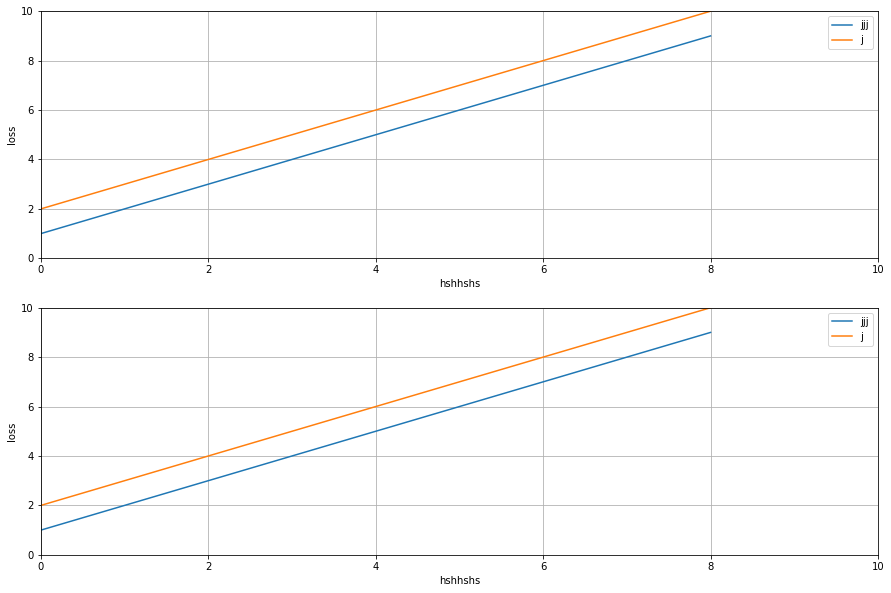

In [343]:
x = [list(range(1,10)), list(range(1,10))]
y = [list(range(2,11)), list(range(2,11))]
fig, ax = plt.subplots(2, figsize=(15,10))
for i in range(len(ax)):
    ax[i].plot(range(len(x[i])), x[i], label="jjj")
    ax[i].plot(range(len(y[i])), y[i], label="j")
    ax[i].set_xlabel("hshhshs")
    ax[i].set_ylabel('loss')
    ax[i].set_xlim(0, 10)
    ax[i].set_ylim(0,10)
    ax[i].grid(True)
    ax[i].legend()

In [300]:
torch.load()

Net(
  (fc1): Linear(in_features=72, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [235]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from category_encoders.target_encoder import TargetEncoder
import warnings
warnings.filterwarnings('ignore') # 关闭警告
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)

data = pd.read_csv('C:/Users/24848/Desktop/onehr.data', sep=',', header=None)
data = data.iloc[:1000, :]

for i in data.columns[1:]:
    data[i] = np.where(data[i] == "?", 0, data[i])
    data[i] = data[i].astype("float")
X_np, y_np = np.array(data.iloc[:,1:-1]), np.array(data.iloc[:,-1])
X, y = torch.from_numpy(X_np).unsqueeze(dim=0), torch.from_numpy(y_np).unsqueeze(dim=0)

In [291]:
for data, target in create_dataloader(X, y):
    print(target.squeeze().shape)

torch.Size([1000])


In [294]:
roc_auc_score(np.array([1,0,1]).astype("float"), np.array([0.1,0.2,0.3]))

0.5

### 文本数据预处理过程

#### 1. 使用gensim处理

In [102]:
from gensim import corpora
from gensim import models

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# 去掉停用词
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist] for document in documents]
print("texts: {}".format(texts))

dictionary = corpora.Dictionary(texts)   # 生成词典
# 去掉出现少于两次的单词，去掉出现多于5次的单词，剩下的单词保留前100个
dictionary.filter_extremes(no_below = 2, no_above = 5, keep_n = 100)
texts1 = [[word for word in text if word in dictionary.token2id] for text in texts] # 更新texts
print("\ntexts1: {}".format(texts1))
print("\nID: ", dictionary.token2id) # diction.token2id 存放的是单词-id key-value对
print("Freq: ", dictionary.dfs) # diction.dfs 存放的是单词的出现频率

# 1. 下面是用TF-IDF模型进行编码
# 参考资料1：https://zhuanlan.zhihu.com/p/37175253
# 参考资料2：https://www.cnblogs.com/keye/p/9190304.html

# 建立语料库
corpus = [dictionary.doc2bow(text) for text in texts] # 将文本数据转为id和频率数据（主要看dic的状态，texts不更新结果也一样）
print("\ncorpus: {}".format(corpus))

# 建立TF-IDF模型并生成矩阵
tfidf_model = models.TfidfModel(corpus) # 训练TF-IDF模型，这个模型可以保存，详情见参考资料
corpus_tfidf = tfidf_model[corpus] # 进行预测，获得TF-IDF矩阵，但是是个迭代器类型，只能用for来把每个样本的向量取出
# 注意：上面这个预测过程不仅仅可以预测原数据，也可以预测别的数据，只要保证数据格式符合要求，且其映射成的字典需与模型训练集的相同
print("TFIDF矩阵: {}".format([v for v in corpus_tfidf]))

# 2. 下面是用work2vec方法进行编码
# 关于使用方法的详情，请见官方文档：https://radimrehurek.com/gensim/models/word2vec.html
model = models.word2vec.Word2Vec(texts1, min_count=1) # 训练模型，输入的是分词的结果，参数细节见https://blog.csdn.net/u011748542/article/details/85880852
model.wv.most_similar("user",topn=10) # 计算训练集见过的词中与输入词的相似度，并降序排列取出前十个(输入词必须见过)
model.wv.similarity('user', 'computer') # 计算两个输入词的相似性（输入词必须都见过）
# model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1) # 猜词，结果是queen，这个不使用前面的数据了
model.wv[texts1[0]].mean(axis = 1) # 测试模型，输入的词必须是训练过的，这里输入第一个样本的分词结果，得到第一个样本的全部词向量，然后做平均

texts: [['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'], ['generation', 'random', 'binary', 'unordered', 'trees'], ['intersection', 'graph', 'paths', 'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]

texts1: [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]

ID:  {'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'tree

array([[ 9.7702928e-03,  8.1651136e-03,  1.2809705e-03,  5.0975773e-03,
         1.4081288e-03, -6.4551616e-03, -1.4280510e-03,  6.4491653e-03,
        -4.6173073e-03, -3.9930656e-03,  4.9244044e-03,  2.7130984e-03,
        -1.8479753e-03, -2.8769446e-03,  6.0107303e-03, -5.7167388e-03,
        -3.2367038e-03, -6.4878250e-03, -4.2346334e-03, -8.5809948e-03,
        -4.4697905e-03, -8.5112313e-03,  1.4037776e-03, -8.6181974e-03,
        -9.9166557e-03, -8.2016252e-03, -6.7726658e-03,  6.6805840e-03,
         3.7845564e-03,  3.5616636e-04, -2.9579829e-03, -7.4283220e-03,
         5.3341867e-04,  4.9989222e-04,  1.9561767e-04,  8.5259438e-04,
         7.8633073e-04, -6.8161491e-05, -8.0070542e-03, -5.8702733e-03,
        -8.3829118e-03, -1.3120436e-03,  1.8206357e-03,  7.4171280e-03,
        -1.9634271e-03, -2.3252917e-03,  9.4871549e-03,  7.9703328e-05,
        -2.4045228e-03,  8.6048460e-03,  2.6870037e-03, -5.3439736e-03,
         6.5881060e-03,  4.5101522e-03, -7.0544672e-03, -3.23174

#### 2. 使用nn.embedding+预训练处理

用于深度学习NLP问题，纯词向量特征，每个词一个向量后pooling在一起

In [160]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data.dataset as Dataset
import torch.utils.data.dataloader as DataLoader
# 看下面内容前，一定先看参考资料：https://blog.csdn.net/lssc4205/article/details/79474735，弄清楚三个pad函数是干嘛的

# 1. 假设我们已经完成了所有的分词工作，并且要使用预训练好的大型embedding矩阵进行编码
# 注：（其实可以将nn.Embedding作为层放到网络中随模型一起进行有监督的训练来编码，那样最原始的输入不需要embedding，但暂时不讨论这个）
# 2. 假设我们获得了大型embedding矩阵的词字典及每个词的索引位置，并将自己分好词的数据集中每个词转换为对应的词索引
# 3. 文本转为索引后，经常面临不同batch维度不一致问题，导致数据不能输入模型，下面是一般的处理过程：

# 3.1 首先把词索引矩阵list一下，变成下面的列表型，每个元素都是一个样本的词向量索引列表，然后按索引长度对样本降序排序：（降序的原因在后面）
train_x = [torch.tensor([0, 1, 3]),
           torch.tensor([2, 3]),
           torch.tensor([3])]

# 3.2 然后使用pad_sequence对长度不齐的部分进行数据补值，默认值自选padding_value
train_x1 = nn.utils.rnn.pad_sequence(train_x, batch_first=True, padding_value=0) # 填充值可以随便选，后面不会被计算

# 3.3 维度问题解决后，进行假装进行embedding
weight = torch.FloatTensor([[1, 2.3, 3], 
                            [4, 5.1, 6.3],
                            [0.3,4.5,2.4],
                            [3, 4, 5.0]]) # 假装weight就是大型矩阵
embedding = nn.Embedding.from_pretrained(weight) # 直接承接预训练结果
embedded = embedding(train_x1) # 对填充后的tensor列表进行embedding操作，结果集中原本不存在的部分也被编码了，但后面会去除

# 3.4 关键步骤：对上述结果压缩为PackedSequence类型，第二个参数是每个样本的词个数组成的列表，必须用最开始数据的长度列表（压缩的原因见最后）
padded_data = nn.utils.rnn.pack_padded_sequence(embedded, [len(data) for data in train_x], batch_first=True)
# 解答：样本按词数降序排序的原因就是为了在告诉函数长度列表后，他能知道每个seq中哪些样本的词是被填补的词，这部分是不会输入模型的
# 注意：其实到3.4为止，其结果就可以被RNN和LSTM给接受了（attention暂时不知)，可以直接输入模型，模型自己就知道该跑哪些部分，但是线性层不可以使用

# 3.5 将数据转回tensor格式，所有填补的词的embedding向量在这里都是0向量
packed_data = nn.utils.rnn.pad_packed_sequence(padded_data, batch_first=True) # 这个结果可以输入模型了
# 注：压缩原因：一般为了避免不必要的存储和计算（填充词即便是0也会占资源，调用计算），在RNN和LSTM模型中，不把3.5后结果扔进去，而是用3.4后的结果，填充的部分自动忽略
# 当从循环网络出来后接线性层时，再把得到的结果经过3.5过程转化为tensor；如果不是RNN或LSTM，就不一定能这样做了


#  以下步骤待定，不一定采用，下次再写
class MyData(Dataset.Dataset):
    def __init__(self, train_x):
        self.train_x = train_x
    def __len__(self):
        return len(self.train_x)
    def __getitem__(self, item):
        return self.train_x[item]

def collate_fn(train_data):
    train_data.sort(key = lambda data: len(data), reverse = True)
    data_length = [len(data) for data in train_data]
    train_data = nn.utils.rnn.pad_sequence(train_data, batch_first=True, padding_value=0) # padding过程
    return train_data.unsqueeze(-1), data_length

train_data = MyData(train_x)
train_dataloader = DataLoader.DataLoader(train_data, batch_size=2, collate_fn=collate_fn)

# padding后的结果
# for data, length in train_dataloader:
#     print(data)
#     print(length)
# padding后会有资源浪费，继续padded可以让每次循环输入后没有0填充值（必须再padding后操作）

net = nn.LSTM(1, 5, batch_first=True) # 简单的模型
Linear = nn.Linear(5, 2)
for data, length in train_dataloader:
    data = nn.utils.rnn.pack_padded_sequence(data, length, batch_first=True) # padded操作
    print(data) # padded后的数据
    output, hidden = net(data.float()) # 将padded后的数据输入模型得到output，这个padded后的输入仅能在LSTM或RNN层输入，不能输入普通线性层
    print(output,"\n\n")
    output, out_len = nn.utils.rnn.pad_packed_sequence(output, batch_first=True) # 将output转回正常形态以方便接下来接入线性层
    print(output,"\n\n") # 普通状态的output展示
    print(F.softmax(Linear(output), dim = 2)) # 输出概率结果
    break

PackedSequence(data=tensor([[1],
        [2],
        [2],
        [3],
        [3],
        [4],
        [4],
        [5],
        [5],
        [6],
        [6],
        [7],
        [7]]), batch_sizes=tensor([2, 2, 2, 2, 2, 2, 1]), sorted_indices=None, unsorted_indices=None)
PackedSequence(data=tensor([[ 0.1443,  0.0625, -0.0232,  0.1436,  0.1275],
        [ 0.2047,  0.1032,  0.0009,  0.2001,  0.1720],
        [ 0.2918,  0.1329, -0.0132,  0.2646,  0.2305],
        [ 0.3570,  0.1644,  0.0121,  0.3265,  0.2902],
        [ 0.4013,  0.1807,  0.0043,  0.3498,  0.3163],
        [ 0.4515,  0.1960,  0.0237,  0.3876,  0.3774],
        [ 0.4726,  0.2066,  0.0198,  0.3947,  0.3901],
        [ 0.5081,  0.2103,  0.0323,  0.4091,  0.4491],
        [ 0.5179,  0.2178,  0.0305,  0.4110,  0.4556],
        [ 0.5428,  0.2147,  0.0372,  0.4115,  0.5099],
        [ 0.5474,  0.2205,  0.0364,  0.4120,  0.5132],
        [ 0.5649,  0.2140,  0.0388,  0.4063,  0.5607],
        [ 0.5669,  0.2188,  0.0385,  0.406

In [2]:
train_x = [torch.tensor([0, 1, 3]),
           torch.tensor([2, 3]),
           torch.tensor([3])]
train_x1 = nn.utils.rnn.pad_sequence(train_x, batch_first=True, padding_value=0)
weight = torch.FloatTensor([[1, 2.3, 3], 
                            [4, 5.1, 6.3],
                            [0.3,4.5,2.4],
                            [3, 4, 5.0]]) # 假装weight就是大型矩阵
embedding = nn.Embedding.from_pretrained(weight) # 直接承接预训练结果
embedded = embedding(train_x1)
padded_embed = nn.utils.rnn.pack_padded_sequence(embedded, [len(data) for data in train_x], batch_first=True)
linear = nn.Linear(3,1)
linear(padded_embed)
# nn.utils.rnn.pad_packed_sequence(padded_embed, batch_first=True)
# 4. 接下来是embedding，把每个tensor换成词向量，然后再进行下面的操作，假装embedding过了


NameError: name 'nn' is not defined